import numpy as np
import qiskit
from qiskit import IBMQ
#IBMQ.save_account('c0a05a7db6e2a445a42336f5939f9bb0526164f8364d65c24c3dfd1549edf1cfc178fa04f539f3001fd2364e26447e27f45126994f800bfe8699683e9eccfbf0)
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import Permutation
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit, assemble, Aer, execute
from qiskit.visualization import plot_histogram

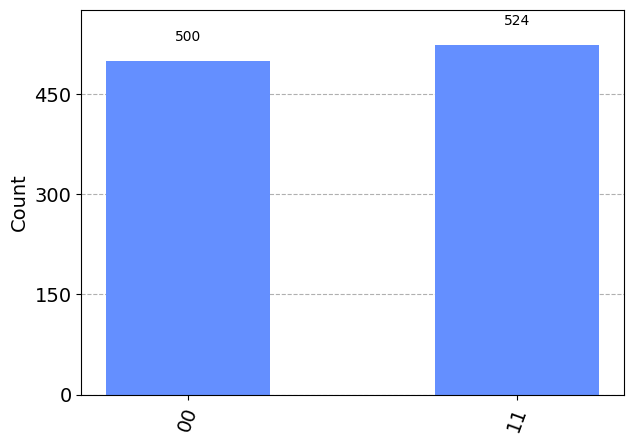

In [2]:
import numpy as np
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram

# 1️⃣ IBM Quantum API 토큰 저장 (최초 1회만 실행하면 됨)
IBMProvider.save_account(
    token="c0a05a7db6e2a445a42336f5939f9bb0526164f8364d65c24c3dfd1549edf1cfc178fa04f539f3001fd2364e26447e27f45126994f800bfe8699683e9eccfbf0",
    overwrite=True
)

# 2️⃣ 토큰을 이용해 IBM Quantum 계정 로그인
provider = IBMProvider()

# 3️⃣ Aer 시뮬레이터 백엔드 선택
backend = AerSimulator()

# 4️⃣ 예시 회로 생성
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

# 5️⃣ 트랜스파일 및 실행
tqc = transpile(qc, backend)
job = backend.run(tqc, shots=1024)
result = job.result()
counts = result.get_counts()

# 6️⃣ 결과 시각화
plot_histogram(counts)


In [ ]:
dsadsadaasdsdasdsadsa

In [3]:
from qiskit_aer import AerSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import Aer


backend = AerSimulator()

#import qiskit
#print("Qiskit 위치:", qiskit.__file__)
#from qiskit.providers.aer import AerSimulator
#print("AerSimulator OK")

#import sys
#print("현재 사용 중인 Python 경로:", sys.executable)

In [4]:
qiskit.__version__

NameError: name 'qiskit' is not defined

In [5]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator
import math

psi1 = Statevector([math.cos(math.pi / 8), math.sin(math.pi / 8)])
psi2 = Statevector([math.cos(5 * math.pi / 8), math.sin(5 * math.pi / 8)])

# When given a Statevector input, the Operator function returns the outer
# product of that state vector with itself — or, in other words, the
# product of the vector times its conjugate transpose.

H = Operator(psi1) - Operator(psi2)

display(array_to_latex(H))

<IPython.core.display.Latex object>

In [3]:
qiskit.__version__

NameError: name 'qiskit' is not defined

In [5]:
qiskit.__qiskit_version__

NameError: name 'qiskit' is not defined

In [6]:
def SET_N(n):
    logn=0
    while(n>(1<<logn)):
        logn += 1
    n_in=QuantumRegister(logn)
    qc=QuantumCircuit(n_in)

    for i in range(logn):
        if(((n>>i)%2)==1):
            qc.x(n_in[i])
        
    return qc

In [7]:
def SET_N_n(n1, n2):
    logn=0
    while(n1>(1<<logn)):
        logn += 1
    n_in=QuantumRegister(n2)
    qc=QuantumCircuit(n_in)

    for i in range(n2):
        if(((n1>>i)%2)==1):
            qc.x(n_in[i])
        
    return qc

def C_SET_N_n(n1, n2):
    logn=0
    while(n1>(1<<logn)):
        logn += 1
    n_in=QuantumRegister(n2)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(n_in, controlled)

    for i in range(n2):
        if(((n1>>i)%2)==1):
            qc.cx(controlled[0], n_in[i])
        
    return qc

In [8]:
def rotate(a_in, n):
    return a_in[n:] + a_in[:n]

In [9]:
def CDKM(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla)
    
    if(n>=3):
        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])

        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])

        qc.cx(b[2], b[1])
        qc.ccx(ancilla[0], a[1], b[1])

        for i in range(n-3):
            qc.cx(b[i+3], b[i+2])
            qc.ccx(b[i+1],a[i+2],b[i+2])

        qc.cx(b[n-1], carry[0])
        qc.ccx(b[n-2], a[n-1], carry[0])

        qc.x(a[1])
        qc.cx(ancilla[0], a[1])

        for i in range(n-3):
            qc.x(a[i+2])
            qc.cx(b[i+1],a[i+2])

        qc.cx(b[n-2], a[n-1])

        for i in range(n-3):
            qc.ccx(b[n-i-3], a[n-i-2], b[n-i-2])
            qc.x(a[n-i-2])
            qc.cx(b[n-i-1], b[n-i-2])

        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(a[1])
        qc.cx(b[2], b[1])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])
        
        for i in range(n):
            qc.cx(b[i], a[i])
    elif(n==2):
        qc.cx(b[0], a[0])
        qc.cx(b[0], ancilla[0])
        qc.ccx(ancilla[0], a[0], b[0])
        qc.cx(b[1], a[1])
        qc.cx(b[1], b[0])
        qc.ccx(b[0], a[1], b[1])
        qc.cx(b[1], carry[0])
        qc.ccx(b[0], a[1], b[1])
        qc.cx(b[1], b[0])
        qc.cx(b[0], a[1])
        qc.ccx(ancilla[0], a[0], b[0])
        qc.cx(b[0], ancilla[0])
        qc.cx(ancilla[0], a[0])
    elif(n==1):
        qc.ccx(a[0], b[0], carry[0])
        qc.cx(b[0], a[0])    

    return qc

def I_CDKM(n):
    qc=CDKM(n).reverse_ops()

    return qc

def CDKM_carryless(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,ancilla)
    
    if(n>=3):
        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])

        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])

        qc.cx(b[2], b[1])
        qc.ccx(ancilla[0], a[1], b[1])

        for i in range(n-3):
            qc.cx(b[i+3], b[i+2])
            qc.ccx(b[i+1],a[i+2],b[i+2])

        qc.x(a[1])
        qc.cx(ancilla[0], a[1])

        for i in range(n-3):
            qc.x(a[i+2])
            qc.cx(b[i+1],a[i+2])

        qc.cx(b[n-2], a[n-1])

        for i in range(n-3):
            qc.ccx(b[n-i-3], a[n-i-2], b[n-i-2])
            qc.x(a[n-i-2])
            qc.cx(b[n-i-1], b[n-i-2])

        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(a[1])
        qc.cx(b[2], b[1])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])
        
        for i in range(n):
            qc.cx(b[i], a[i])
    elif(n==2):
        qc.ccx(a[0], b[0], a[1])
        qc.cx(b[0], a[0])
        qc.cx(b[1], a[1])
    elif(n==1):
        qc.cx(b[0], a[0])    

    return qc

def I_CDKM_carryless(n):
    qc=CDKM_carryless(n).reverse_ops()

    return qc

In [10]:
def CDKM_o(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n-1)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla)

    if(n>=4):
        for i in range(n-2):
            qc.cx(b[i+1], a[i+1])

        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])

        qc.cx(b[2], b[1])
        qc.ccx(ancilla[0], a[1], b[1])

        for i in range(n-4):
            qc.cx(b[i+3], b[i+2])
            qc.ccx(b[i+1],a[i+2],b[i+2])
        
        qc.ccx(b[n-3],a[n-2],b[n-2])        
        qc.ccx(b[n-2], a[n-1], carry[0])

        qc.x(a[1])
        qc.cx(ancilla[0], a[1])

        for i in range(n-3):
            qc.x(a[i+2])
            qc.cx(b[i+1],a[i+2])

        qc.cx(b[n-2], a[n-1])

        qc.ccx(b[n-3], a[n-2], b[n-2])
        qc.x(a[n-2])        
        
        for i in range(n-4):
            qc.ccx(b[n-i-4], a[n-i-3], b[n-i-3])
            qc.x(a[n-i-3])
            qc.cx(b[n-i-2], b[n-i-3])

        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(a[1])
        qc.cx(b[2], b[1])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])
        
        for i in range(n-1):
            qc.cx(b[i], a[i])
    elif(n==3):
        qc.cx(b[1], a[1])
        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(a[1])
        qc.ccx(b[1], a[2], carry[0])
        qc.cx(ancilla[0], a[1])
        qc.cx(b[1], a[2])
        qc.x(a[1])
        qc.ccx(ancilla[0], a[1], b[1])        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])
        qc.cx(b[0], a[0])
        qc.cx(b[1], a[1])
    elif(n==2):
        qc.cx(b[0], a[0])
        qc.cx(b[0], ancilla[0])
        qc.ccx(ancilla[0], a[0], b[0])
        qc.ccx(b[0], a[1], carry[0])
        qc.cx(b[0], a[1])
        qc.ccx(ancilla[0], a[0], b[0])
        qc.cx(b[0], ancilla[0])
        qc.cx(ancilla[0], a[0])        

    return qc

def I_CDKM_o(n):
    qc=CDKM_o(n).reverse_ops()

    return qc

In [11]:
def CDKM_proth(p):

    n=0
    while(p>(1<<n)):
        n += 1

    a=QuantumRegister(n)
    b=QuantumRegister(n-2)
    carry=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry)
    
    pm1 = p - 1
    m = 0 

    while((pm1%2)!=1):
        pm1=pm1//2
        m+=1
    k=pm1
    logk=0

    while(k>(1<<logk)):
        logk += 1
    
    for i in range(logk):
        if(((k>>i)%2)==1):
            qc.x(a[i+m])

    for i in range(logk):
        if(((k>>i)%2)==1):
            qc.x(b[i+m-2])
    
    qc.ccx(a[0], a[1], b[0])

    for i in range(n-3):
        qc.ccx(b[i], a[i+2], b[i+1])

    qc.x(carry[0])

    for i in range(n-2):
        qc.x(a[i+1])
    
    qc.ccx(b[n-3], a[n-1], carry[0])

    qc.cx(a[0], a[1])

    for i in range(n-2):
        qc.cx(b[i], a[i+2])
    
    for i in range(n-3):
        qc.ccx(b[n-i-4], a[n-i-2], b[n-i-3])
    
    qc.ccx(a[0], a[1], b[0])
    
    for i in range(n-2):
        qc.x(a[i+1])
    
    qc.x(a[0])

    for i in range(logk):
        if(((k>>i)%2)==1):
            qc.x(b[i+m-2])
    
    for i in range(logk):
        if(((k>>i)%2)==1):
            qc.x(a[i+m])

    return qc

def I_CDKM_proth(p):
    qc=CDKM_proth(p).reverse_ops()

    return qc

def C_CDKM_proth_carryless(p):    

    n=0
    while(p>(1<<n)):
        n += 1

    a=QuantumRegister(n)
    b=QuantumRegister(n-2)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,controlled)

    pm1 = p - 1
    m = 0 

    while((pm1%2)!=1):
        pm1=pm1//2
        m+=1
    k=pm1
    logk=0

    while(k>(1<<logk)):
        logk += 1
    
    #logk X, logk-1 O => Carryless circuit does not need qc.ccx(b[n-3], a[n-1], carry[0]). So both side of qc.x(a[n-1]) disappear.
    for i in range(logk-1):
        if(((k>>i)%2)==1):
            qc.x(a[i+m])

    for i in range(logk):
        if(((k>>i)%2)==1):
            qc.x(b[i+m-2])
    
    qc.ccx(a[0], a[1], b[0])
    
    for i in range(n-3):        
        qc.ccx(b[i],a[i+2],b[i+1])

    for i in range(n-3):        
        qc.ccx(controlled[0], b[n-i-3], a[n-i-1])
        qc.ccx(b[n-i-4], a[n-i-2], b[n-i-3])

    qc.ccx(controlled[0], b[0], a[2])    
    qc.ccx(a[0], a[1], b[0])
    qc.ccx(controlled[0], a[0], a[1])

    qc.cx(controlled[0], a[0])

    for i in range(logk):
        if(((k>>i)%2)==1):
            qc.x(b[i+m-2])
    
    for i in range(logk-1):
        if(((k>>i)%2)==1):
            qc.x(a[i+m])

    return qc

In [12]:
def C_CDKM_origin(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla,controlled)
    
    if(n>=3):
        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])

        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])

        qc.cx(b[2], b[1])
        qc.ccx(ancilla[0], a[1], b[1])

        for i in range(n-3):
            qc.cx(b[i+3], b[i+2])
            qc.ccx(b[i+1],a[i+2],b[i+2])

        qc.ccx(b[n-2], a[n-1], b[n-1])
        qc.ccx(controlled[0], b[n-1], carry[0])
        qc.ccx(b[n-2], a[n-1], b[n-1])

        qc.ccx(controlled[0], b[n-2], a[n-1])

        
        
        ############ Option 1 ############
        #qc.x(ancilla[0])
        #qc.ccx(controlled[0], ancilla[0], a[1])
        #qc.x(ancilla[0])        
        
        #for i in range(n-3):
            #qc.x(b[i+1])            
            #qc.ccx(controlled[0], b[i+1], a[i+2])            
            #qc.x(b[i+1])
        
        
        ############ Option 1 ############
        
        
        ############ Option 2 ############
        
        
        for i in range(n-3):
            qc.x(b[n-3-i])                        
            qc.ccx(controlled[0], b[n-3-i], a[n-2-i])
            qc.x(b[n-3-i])
        
        qc.x(ancilla[0])
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.x(ancilla[0])        
            
        ############ Option 2 ############

        
        for i in range(n-3):        
            qc.ccx(b[n-i-3], a[n-i-2], b[n-i-2])
            qc.cx(b[n-i-1], b[n-i-2])
            qc.cx(controlled[0], a[n-i-2])

        qc.ccx(ancilla[0], a[1], b[1])    
        qc.cx(b[2], b[1])
        qc.cx(controlled[0], a[1]) 

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])

        qc.ccx(controlled[0], b[0], a[0])
        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])
    elif(n==2):
        qc.ccx(controlled[0], b[0], a[0])
        qc.cx(b[0], ancilla[0])
        qc.ccx(ancilla[0], a[0], b[0])
        qc.ccx(controlled[0], b[1], a[1])
        qc.cx(b[1], b[0])
        qc.ccx(b[0], a[1], b[1])
        qc.ccx(controlled[0], b[1], carry[0])
        qc.ccx(b[0], a[1], b[1])
        qc.cx(b[1], b[0])
        qc.ccx(controlled[0], b[0], a[1])
        qc.ccx(ancilla[0], a[0], b[0])
        qc.cx(b[0], ancilla[0])
        qc.ccx(controlled[0], ancilla[0], a[0])
    elif(n==1):
        qc.ccx(a[0], b[0], ancilla[0])
        qc.ccx(ancilla[0], controlled[0], carry[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.ccx(controlled[0], b[0], a[0])

    return qc

def C_CDKM(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla,controlled)
    
    if(n>=6):
        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])

        qc.cx(b[1], ancilla[0])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.ccx(controlled[0], b[0], a[0])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])

        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.x(b[1])
        qc.ccx(b[2], a[3], b[3])
        qc.cx(b[5], b[4])

        for i in range(n-6):
            qc.ccx(controlled[0], b[i+1], a[i+2])
            qc.x(b[i+2])
            qc.ccx(b[i+3], a[i+4], b[i+4])
            qc.cx(b[i+6], b[i+5])
        
        qc.ccx(controlled[0], b[n-5], a[n-4])
        qc.x(b[n-4])
        qc.ccx(b[n-3], a[n-2], b[n-2])

        qc.ccx(controlled[0], b[n-4], a[n-3])
        qc.x(b[n-3])
        qc.ccx(b[n-2], a[n-1], b[n-1])

        qc.ccx(controlled[0], b[n-1], carry[0])
        
        qc.ccx(controlled[0], b[n-3], a[n-2])
        qc.ccx(b[n-2], a[n-1], b[n-1])

        qc.ccx(controlled[0], b[n-2], a[n-1])
        qc.x(b[n-3])

        qc.x(b[n-4])
        qc.ccx(b[n-3], a[n-2], b[n-2])

        for i in range(n-5):
            qc.cx(controlled[0], a[n-2-i])
            qc.x(b[n-5-i])
            qc.ccx(b[n-4-i], a[n-3-i], b[n-3-i])
            qc.cx(b[n-1-i], b[n-2-i])
        
        qc.cx(controlled[0], a[3])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])

        qc.cx(controlled[0], a[2])
        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.cx(controlled[0], a[1])        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.cx(b[1], ancilla[0])

        qc.cx(controlled[0], a[0])

        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])        
            
    elif(n==5):
        for i in range(4):            
            qc.cx(b[i+1], a[i+1])
        
        qc.cx(b[1], ancilla[0])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.ccx(controlled[0], b[0], a[0])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])

        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.x(b[1])
        qc.ccx(b[2], a[3], b[3])        

        qc.ccx(controlled[0], b[1], a[2])
        qc.x(b[2])
        qc.ccx(b[3], a[4], b[4])

        qc.ccx(controlled[0], b[4], carry[0])
        
        qc.ccx(controlled[0], b[2], a[3])
        qc.ccx(b[3], a[4], b[4])

        qc.ccx(controlled[0], b[3], a[4])
        qc.x(b[2])
        qc.x(b[1])
        
        qc.ccx(b[2], a[3], b[3])
        
        qc.cx(controlled[0], a[3])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])

        qc.cx(controlled[0], a[2])
        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.cx(controlled[0], a[1])        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.cx(b[1], ancilla[0])

        qc.cx(controlled[0], a[0])

        for i in range(4):
            qc.cx(b[i+1], a[i+1])
    elif(n==4):
        for i in range(3):            
            qc.cx(b[i+1], a[i+1])
        
        qc.cx(b[1], ancilla[0])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
                
        qc.ccx(controlled[0], b[0], a[0])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.x(b[1])
        qc.ccx(b[2], a[3], b[3])
        
        qc.ccx(controlled[0], b[3], carry[0])
        
        qc.ccx(controlled[0], b[1], a[2])
        qc.ccx(b[2], a[3], b[3])
        
        qc.ccx(controlled[0], b[2], a[3])
        qc.x(b[1])
        qc.x(ancilla[0])
        
        qc.ccx(b[1], a[2], b[2])
        
        qc.cx(controlled[0], a[2])
        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
        
        qc.cx(controlled[0], a[1])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        
        qc.cx(b[1], ancilla[0])
        
        qc.cx(controlled[0], a[0])
        
        for i in range(3):
            qc.cx(b[i+1], a[i+1])
    elif(n==3):
        for i in range(2):            
            qc.cx(b[i+1], a[i+1])
        
        qc.cx(b[1], ancilla[0])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        
        qc.ccx(controlled[0], b[0], a[0])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        
        qc.ccx(controlled[0], b[2], carry[0])
        
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.ccx(b[1], a[2], b[2])
        
        qc.ccx(controlled[0], b[1], a[2])
        
        qc.x(ancilla[0])
        qc.x(b[0])
        
        qc.ccx(ancilla[0], a[1], b[1])
        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.cx(controlled[0], a[1])
        
        qc.cx(b[1], ancilla[0])
        
        qc.cx(controlled[0], a[0])
        
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2])
    elif(n==2):
        qc.cx(b[1], a[1])
        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.ccx(controlled[0], b[1], carry[0])
        qc.ccx(controlled[0], b[0], a[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.x(b[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])
        qc.cx(controlled[0], a[0])
        qc.cx(b[1], a[1])
    elif(n==1):
        qc.ccx(a[0], b[0], ancilla[0])
        qc.ccx(controlled[0], ancilla[0], carry[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.ccx(controlled[0], b[0], a[0])        
        
    return qc

def I_C_CDKM(n):
    qc=C_CDKM(n).reverse_ops()

    return qc

def C_CDKM_carryless(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,ancilla,controlled)

    if(n>=6):
        for i in range(n-2):
            qc.cx(b[i+1], a[i+1])

        qc.cx(b[1], ancilla[0])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.ccx(controlled[0], b[0], a[0])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])

        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.x(b[1])
        qc.ccx(b[2], a[3], b[3])
        qc.cx(b[5], b[4])

        for i in range(n-6):
            qc.ccx(controlled[0], b[i+1], a[i+2])
            qc.x(b[i+2])
            qc.ccx(b[i+3], a[i+4], b[i+4])
            qc.cx(b[i+6], b[i+5])
        
        qc.ccx(controlled[0], b[n-5], a[n-4])
        qc.x(b[n-4])
        qc.ccx(b[n-3], a[n-2], b[n-2])

        qc.ccx(controlled[0], b[n-2], a[n-1])
        
        qc.ccx(controlled[0], b[n-4], a[n-3])
        qc.ccx(b[n-3], a[n-2], b[n-2])
        
        qc.ccx(controlled[0], b[n-3], a[n-2])
        qc.cx(b[n-1], b[n-2])
        
        for i in range(n-3):
            qc.x(b[i])
        qc.x(ancilla[0]) 
                
        qc.ccx(b[n-4], a[n-3], b[n-3])

        for i in range(n-5):
            qc.cx(controlled[0], a[n-3-i])
            qc.ccx(b[n-5-i], a[n-4-i], b[n-4-i])
            qc.cx(b[n-2-i], b[n-3-i])
        
        qc.cx(controlled[0], a[2])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.cx(controlled[0], a[1])        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.cx(b[1], ancilla[0])

        qc.cx(controlled[0], a[0])

        for i in range(n-2):
            qc.cx(b[i+1], a[i+1])
    elif(n==5):        
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2])
        qc.cx(b[3], a[3])
        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
        qc.ccx(controlled[0], b[0], a[0])
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.ccx(b[2], a[3], b[3])
        qc.cx(controlled[0], a[2])
        qc.x(b[2])
        qc.ccx(controlled[0], b[2], a[3])
        qc.ccx(controlled[0], b[3], a[4])
        qc.x(b[0])
        qc.x(ancilla[0])
        qc.x(b[2])
        qc.ccx(controlled[0], b[1], a[2])
        qc.ccx(b[2], a[3], b[3])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])
        qc.cx(controlled[0], a[3])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
        qc.cx(controlled[0], a[2])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.cx(controlled[0], a[1])
        qc.cx(b[1], ancilla[0])
        qc.cx(controlled[0], a[0])
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2]) 
        qc.cx(b[3], a[3]) 
    elif(n==4):        
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2])
        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.x(b[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
        qc.ccx(controlled[0], b[0], a[0])
        qc.ccx(b[1], a[2], b[2])        
        qc.cx(controlled[0], a[1])
        qc.x(b[1])
        qc.ccx(controlled[0], b[1], a[2])
        qc.ccx(controlled[0], b[2], a[3])
        qc.x(b[0])
        qc.x(b[1])
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.ccx(b[1], a[2], b[2])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
        qc.cx(controlled[0], a[2])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.cx(controlled[0], a[1])
        qc.cx(b[1], ancilla[0])
        qc.cx(controlled[0], a[0])
        qc.cx(b[2], a[2])
        qc.cx(b[1], a[1])        
    elif(n==3):
        qc.cx(b[1], a[1])
        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.cx(controlled[0], a[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(ancilla[0])
        qc.ccx(controlled[0], ancilla[0], a[1])
        qc.ccx(controlled[0], b[1], a[2])
        qc.x(ancilla[0])
        qc.ccx(controlled[0], b[0], a[0])
        qc.ccx(ancilla[0], a[1], b[1])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.cx(controlled[0], a[1])
        qc.cx(b[1], ancilla[0])
        qc.cx(b[1], a[1])
        qc.cx(controlled[0], a[0])
    elif(n==2):
        qc.ccx(a[0], b[0], b[1])
        qc.ccx(controlled[0], b[1], a[1])
        qc.ccx(a[0], b[0], b[1])
        qc.ccx(controlled[0], b[0], a[0])
    elif(n==1):
        qc.ccx(controlled[0], b[0], a[0])

    return qc

def I_C_CDKM_carryless(n):
    qc=C_CDKM_carryless(n).reverse_ops()

    return qc

def C_CDKM_NOPT(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla,controlled)
    
    
    qc.ccx(b[0], controlled[0], a[0])
    qc.cx(b[0], ancilla[0])
    qc.ccx(ancilla[0], a[0], b[0])
    
    for i in range(n-1):
        qc.ccx(b[i+1], controlled[0], a[i+1])
        qc.cx(b[i+1], b[i])
        qc.ccx(b[i], a[i+1], b[i+1])
    
    qc.cx(b[n-1], carry[0])
    
    for i in range(n-1):
        qc.ccx(b[n-2-i], a[n-1-i], b[n-1-i])
        qc.cx(b[n-1-i], b[n-2-i])
        qc.ccx(b[n-2-i], controlled[0], a[n-1-i])
            
    qc.ccx(ancilla[0], a[0], b[0])
    qc.cx(b[0], ancilla[0])
    qc.ccx(ancilla[0], controlled[0], a[0])    
    
    return qc

def C_CDKM_NOPT_carryless(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla,controlled)
    
    
    if (n>=2):
        qc.ccx(b[0], controlled[0], a[0])
        qc.cx(b[0], ancilla[0])
        qc.ccx(ancilla[0], a[0], b[0])


        for i in range(n-2):
            qc.ccx(b[i+1], controlled[0], a[i+1])
            qc.cx(b[i+1], b[i])
            qc.ccx(b[i], a[i+1], b[i+1])

        qc.ccx(b[n-1], controlled[0], a[n-1])
        qc.ccx(b[n-2], controlled[0], a[n-1])

        for i in range(n-2):
            qc.ccx(b[n-3-i], a[n-2-i], b[n-2-i])
            qc.cx(b[n-2-i], b[n-3-i])
            qc.ccx(b[n-3-i], controlled[0], a[n-2-i])

        qc.ccx(ancilla[0], a[0], b[0])
        qc.cx(b[0], ancilla[0])
        qc.ccx(ancilla[0], controlled[0], a[0])    
    
    else:        
        qc.ccx(b[0], controlled[0], a[0])
        qc.ccx(ancilla[0], controlled[0], a[0])    
    
    return qc


def C_THAP_ADD(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla,controlled)
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    qc.ccx(controlled[0], b[n-1], carry[0])
    
    for i in range(n-2):
        qc.cx(b[n-2-i], b[n-1-i])
    
    for i in range(n-1):
        qc.ccx(a[i], b[i], b[i+1])
    
    qc.ccx(a[n-1], b[n-1], ancilla[0])
    qc.ccx(controlled[0], ancilla[0], carry[0])
    qc.ccx(a[n-1], b[n-1], ancilla[0])
    
    for i in range(n-1):
        qc.ccx(controlled[0], b[n-1-i], a[n-1-i])
        qc.ccx(a[n-2-i], b[n-2-i], b[n-1-i])
    
    qc.ccx(controlled[0], b[0], a[0])
    
    for i in range(n-2):
        qc.cx(b[i+1], b[i+2])
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    return qc

def C_THAP_ADD_carryless(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,controlled)
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    for i in range(n-2):
        qc.cx(b[n-2-i], b[n-1-i])
    
    for i in range(n-1):
        qc.ccx(a[i], b[i], b[i+1])
    
    
    for i in range(n-1):
        qc.ccx(controlled[0], b[n-1-i], a[n-1-i])
        qc.ccx(a[n-2-i], b[n-2-i], b[n-1-i])
    
    qc.ccx(controlled[0], b[0], a[0])
    
    for i in range(n-2):
        qc.cx(b[i+1], b[i+2])
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    return qc

def C_THAP_ADD_OPT(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla,controlled)
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    qc.ccx(controlled[0], b[n-1], carry[0])
    
    for i in range(n-2):
        qc.cx(b[n-2-i], b[n-1-i])
    
    qc.ccx(a[0], b[0], b[1])
    
    qc.x(b[0])
    
    qc.ccx(a[1], b[1], b[2])
    
    for i in range(n-3):
        qc.ccx(controlled[0], b[i], a[i])
        qc.x(b[i+1])
        qc.ccx(a[i+2], b[i+2], b[i+3])
    
    qc.ccx(controlled[0], b[n-3], a[n-3])
    qc.x(b[n-2])
    qc.ccx(a[n-1], b[n-1], ancilla[0])
    
    qc.ccx(controlled[0], ancilla[0], carry[0])
    
    qc.x(b[n-1])
    qc.ccx(controlled[0], b[n-1], a[n-1])
    qc.x(b[n-1])
    
    qc.ccx(controlled[0], b[n-2], a[n-2])
    qc.ccx(a[n-1], b[n-1], ancilla[0])
    
    for i in range(n-1):
        qc.x(b[i])
    
    for i in range(n-1):
        qc.cx(controlled[0], a[n-1-i])
        qc.ccx(a[n-2-i], b[n-2-i], b[n-1-i])
    
    qc.cx(controlled[0], a[0])
    
    for i in range(n-2):
        qc.cx(b[i+1], b[i+2])
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    return qc

def C_THAP_ADD_OPT_carryless(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,b,controlled)
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    for i in range(n-2):
        qc.cx(b[n-2-i], b[n-1-i])
    
    qc.ccx(a[0], b[0], b[1])
    
    qc.x(b[0])
    
    qc.ccx(a[1], b[1], b[2])
    
    for i in range(n-3):
        qc.ccx(controlled[0], b[i], a[i])
        qc.x(b[i+1])
        qc.ccx(a[i+2], b[i+2], b[i+3])
    
    qc.ccx(controlled[0], b[n-3], a[n-3])
    qc.x(b[n-2])
    
    qc.ccx(controlled[0], b[n-2], a[n-2])
    qc.ccx(controlled[0], b[n-1], a[n-1])    
    
    for i in range(n-1):
        qc.x(b[i])
    
    qc.ccx(a[n-2], b[n-2], b[n-1])
    
    for i in range(n-2):
        qc.cx(controlled[0], a[n-2-i])
        qc.ccx(a[n-3-i], b[n-3-i], b[n-2-i])
    
    qc.cx(controlled[0], a[0])
    
    for i in range(n-2):
        qc.cx(b[i+1], b[i+2])
    
    for i in range(n-1):
        qc.cx(b[i+1], a[i+1])
    
    return qc

def Inc(n):
    a=QuantumRegister(n)
    garbage=QuantumRegister(n)
    qc=QuantumCircuit(a,garbage)

    for i in range(n-1):
        qc.cx(garbage[0], a[i])
        qc.x(garbage[i+1])
    qc.cx(garbage[0], a[n-1])
    qc.x(a[n-1])

    for i in range(n-1):
        qc.cx(garbage[i], a[i])
        qc.cx(garbage[i+1], garbage[i])
        qc.ccx(garbage[i], a[i], garbage[i+1])

    qc.cx(garbage[n-1], a[n-1])

    for i in range(n-1):
        qc.ccx(garbage[n-i-2], a[n-i-2], garbage[n-i-1])
        qc.cx(garbage[n-i-1], garbage[n-i-2])
        qc.cx(garbage[n-i-1], a[n-i-2])

    for i in range(n-1):        
        qc.x(garbage[i+1])

    for i in range(n-1):
        qc.cx(garbage[i], a[i])
        qc.cx(garbage[i+1], garbage[i])
        qc.ccx(garbage[i], a[i], garbage[i+1])

    qc.cx(garbage[n-1], a[n-1])

    for i in range(n-1):
        qc.ccx(garbage[n-i-2], a[n-i-2], garbage[n-i-1])
        qc.cx(garbage[n-i-1], garbage[n-i-2])
        qc.cx(garbage[n-i-1], a[n-i-2])

    for i in range(n):
        qc.cx(garbage[0], a[i])
    
    return qc

def C_Inc(n):
    a=QuantumRegister(n)
    garbage=QuantumRegister(n)
    controlled=QuantumRegister(1)
    qc=QuantumCircuit(a,garbage, controlled)

    for i in range(n-1):
        qc.cx(garbage[0], a[i])
        qc.x(garbage[i+1])
    qc.cx(garbage[0], a[n-1])
    qc.x(a[n-1])

    for i in range(n-1):
        qc.cx(garbage[i], a[i])
        qc.cx(garbage[i+1], garbage[i])
        qc.ccx(garbage[i], a[i], garbage[i+1])

    qc.cx(garbage[n-1], a[n-1])

    for i in range(n-1):
        qc.ccx(garbage[n-i-2], a[n-i-2], garbage[n-i-1])
        qc.cx(garbage[n-i-1], garbage[n-i-2])
        qc.cx(garbage[n-i-1], a[n-i-2])

    qc.cx(controlled[0])
    qc.cx(controlled[0], garbage[0])
        
    for i in range(n-1):        
        qc.x(garbage[i+1])

    for i in range(n-1):
        qc.cx(garbage[i], a[i])
        qc.cx(garbage[i+1], garbage[i])
        qc.ccx(garbage[i], a[i], garbage[i+1])

    qc.cx(garbage[n-1], a[n-1])

    for i in range(n-1):
        qc.ccx(garbage[n-i-2], a[n-i-2], garbage[n-i-1])
        qc.cx(garbage[n-i-1], garbage[n-i-2])
        qc.cx(garbage[n-i-1], a[n-i-2])

    for i in range(n):
        qc.cx(garbage[0], a[i])
    
    return qc

def Dec(n):
    qc=Inc(n).reverse_ops()

    return qc


def C_Dec(n):
    qc=C_Inc(n).reverse_ops()

    return qc

def CDKM_MUL_before(n_a, n_b, n_mul):
    a=QuantumRegister(n_a)
    b=QuantumRegister(n_b)
    mul=QuantumRegister(n_mul)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,mul,ancilla)

    for i in range(n_a - 1):
        #mul[i:i+n_b], mul[i+n_b:i+n_b+1]=C_CDKM(mul[i:i+n_b], b, mul[i+n_b:i+n_b+1], ancilla, a[i:i+1], n_b)
        add = C_CDKM(n_b).to_instruction()
        qc.append(add, [mul[j+i] for j in range(n_b)]+[b[j] for j in range(n_b)]+[mul[j+i+n_b] for j in range(1)]+[ancilla[j] for j in range(1)]+[a[j+i] for j in range(1)])
    
    if(n_mul==n_a+n_b):
        #mul[n_a-1:n_a+n_b-1], mul[n_a+n_b-1:n_a+n_b]=C_CDKM(mul[n_a-1:n_a+n_b-1], b, mul[n_a+n_b-1:n_a+n_b], ancilla, a[n_a-1:n_a], n_b)
        add = C_CDKM(n_b).to_instruction()
        qc.append(add, [mul[j+n_a-1] for j in range(n_b)]+[b[j] for j in range(n_b)]+[mul[j+n_a+n_b-1] for j in range(1)]+[ancilla[j] for j in range(1)]+[a[j+n_a-1] for j in range(1)])
    else:        
        #mul[n_a-1:n_a+n_b-1] = C_CDKM_carryless(mul[n_a-1:n_a+n_b-1], b, ancilla, a[n_a-1:n_a], n_b)
        add = C_CDKM_carryless(n_b).to_instruction()
        qc.append(add, [mul[j+n_a-1] for j in range(n_b)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[a[j+n_a-1] for j in range(1)])
    
    return qc

def CDKM_MUL(n_a, n_b, n_mul):
    a=QuantumRegister(n_a)
    b=QuantumRegister(n_b)
    mul=QuantumRegister(n_mul)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,mul,ancilla)

    for i in range(n_a - 1):
        #mul[i:i+n_b], mul[i+n_b:i+n_b+1]=C_CDKM(mul[i:i+n_b], b, mul[i+n_b:i+n_b+1], ancilla, a[i:i+1], n_b)
        #add = C_CDKM(n_b).to_instruction()
        #qc.append(add, [mul[j+i] for j in range(n_b)]+[b[j] for j in range(n_b)]+[mul[j+i+n_b] for j in range(1)]+[ancilla[j] for j in range(1)]+[a[j+i] for j in range(1)])
        qc.compose(C_CDKM(n_b), qubits=mul[i:i+n_b] + b[:n_b] + [mul[i+n_b]] + [ancilla[0]] + [a[i]], inplace=True)
    
    if(n_mul==n_a+n_b):
        #mul[n_a-1:n_a+n_b-1], mul[n_a+n_b-1:n_a+n_b]=C_CDKM(mul[n_a-1:n_a+n_b-1], b, mul[n_a+n_b-1:n_a+n_b], ancilla, a[n_a-1:n_a], n_b)
        #add = C_CDKM(n_b).to_instruction()
        #qc.append(add, [mul[j+n_a-1] for j in range(n_b)]+[b[j] for j in range(n_b)]+[mul[j+n_a+n_b-1] for j in range(1)]+[ancilla[j] for j in range(1)]+[a[j+n_a-1] for j in range(1)])
        qc.compose(C_CDKM(n_b), qubits=mul[n_a-1:n_a-1+n_b] + b[:n_b] + [mul[n_a+n_b-1]] + [ancilla[0]] + [a[n_a-1]], inplace=True)
    else:        
        #mul[n_a-1:n_a+n_b-1] = C_CDKM_carryless(mul[n_a-1:n_a+n_b-1], b, ancilla, a[n_a-1:n_a], n_b)
        #add = C_CDKM_carryless(n_b).to_instruction()
        #qc.append(add, [mul[j+n_a-1] for j in range(n_b)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[a[j+n_a-1] for j in range(1)])
        qc.compose(C_CDKM_carryless(n_b), qubits=mul[n_a-1:n_a-1+n_b] + b[:n_b] + [ancilla[0]] + [a[n_a-1]], inplace=True)
    
    return qc

def Division(n_a, n_b):
    a=QuantumRegister(n_a)
    b=QuantumRegister(n_b)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,ancilla)

    #mul = I_CDKM(n_b).to_instruction()
    #qc.append(mul, [a[n_a-n_b+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[carry[j] for j in range(1)]+[ancilla[j] for j in range(1)])
    qc.compose(I_CDKM(n_b), qubits=a[n_a-n_b:n_a] + b[:n_b] + [carry[0]] + [ancilla[0]], inplace=True)

    
    #mul = C_CDKM_carryless(n_b).to_instruction()
    #qc.append(mul, [a[n_a-n_b+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[carry[j] for j in range(1)])
    qc.compose(C_CDKM_carryless(n_b), qubits=a[n_a-n_b:n_a] + b[:n_b] + [ancilla[0]] + [carry[0]], inplace=True)

    for i in range(n_a-n_b):
        #a[n_a-n_b-i-1:n_a-i-1], a[n_a-i-1:n_a-i] = I_CDKM(a[n_a-n_b-i-1:n_a-i-1], b, a[n_a-i-1:n_a-i], ancilla, n_b)
        #mul = I_CDKM(n_b).to_instruction()
        #qc.append(mul, [a[n_a-n_b-1-i+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[a[n_a-i-1+j] for j in range(1)]+[ancilla[j] for j in range(1)])
        qc.compose(I_CDKM(n_b), qubits=a[n_a-n_b-1-i:n_a-1-i] + b[:n_b] + [a[n_a-i-1]] + [ancilla[0]], inplace=True)

        #a[n_a-n_b-i-1:n_a-i-1] = C_CDKM_carryless(a[n_a-n_b-i-1:n_a-i-1], b, ancilla, a[n_a-i-1:n_a-i], n_b)
        #mul = C_CDKM_carryless(n_b).to_instruction()
        #qc.append(mul, [a[n_a-n_b-i-1+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[a[n_a-i-1+j] for j in range(1)])
        qc.compose(C_CDKM_carryless(n_b), qubits=a[n_a-n_b-1-i:n_a-1-i] + b[:n_b] + [ancilla[0]] + [a[n_a-i-1]], inplace=True)

    qc.x(carry[0])

    for i in range(n_a-n_b):
        qc.x(a[n_b+i])

    return qc

def S_Division(n_a, n_b):
    a=QuantumRegister(n_a)
    b=QuantumRegister(n_b)
    carry=QuantumRegister(1)
    sign=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,sign,ancilla)
    
    #a[n_a-n_b:n_a] = C_CDKM_carryless(a[n_a-n_b:n_a], b, ancilla, a[n_a:n_a+1], n_b)

    mul = C_CDKM_carryless(n_b).to_instruction()
    qc.append(mul, [a[n_a-n_b+1+j] for j in range(n_b-1)]+[carry[j] for j in range(1)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[sign[j] for j in range(1)])
    qc.compose(C_CDKM_carryless(n_b), qubits=a[n_a-n_b+1:n_a] + [carry[0]] + b[:n_b] + [ancilla[0]] + [sign[0]], inplace=True)


    #mul = I_CDKM(n_b).to_instruction()
    #qc.append(mul, [a[n_a-n_b+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[carry[j] for j in range(1)]+[ancilla[j] for j in range(1)])
    qc.compose(I_CDKM(n_b), qubits=a[n_a-n_b:n_a] + b[:n_b] + [carry[0]] + [ancilla[0]], inplace=True)
    
    #mul = C_CDKM_carryless(n_b).to_instruction()
    #qc.append(mul, [a[n_a-n_b+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[carry[j] for j in range(1)])
    qc.compose(C_CDKM_carryless(n_b), qubits=a[n_a-n_b:n_a] + b[:n_b] + [ancilla[0]] + [carry[0]], inplace=True)
    

    for i in range(n_a-n_b):
        #mul = I_CDKM(n_b).to_instruction()
        #qc.append(mul, [a[n_a-n_b-1-i+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[a[n_a-i-1+j] for j in range(1)]+[ancilla[j] for j in range(1)])
        qc.compose(I_CDKM(n_b), qubits=a[n_a-n_b-1-i:n_a-1-i] + b[:n_b] + [a[n_a-i-1]] + [ancilla[0]], inplace=True)

        #mul = C_CDKM_carryless(n_b).to_instruction()
        #qc.append(mul, [a[n_a-n_b-i-1+j] for j in range(n_b)]+[b[j] for j in range(n_b)]+[ancilla[j] for j in range(1)]+[a[n_a-i-1+j] for j in range(1)])
        qc.compose(C_CDKM_carryless(n_b), qubits=a[n_a-n_b-1-i:n_a-1-i] + b[:n_b] + [ancilla[0]] + [a[n_a-i-1]], inplace=True)

    qc.x(carry[0])

    for i in range(n_a-n_b):
        qc.x(a[n_b+i])
    
    return qc

def S_Division_proth(n_a, p):
    n_b=0
    while(p>(1<<n_b)):
        n_b += 1
    a=QuantumRegister(n_a)
    b=QuantumRegister(n_b-2)
    carry=QuantumRegister(1)
    sign=QuantumRegister(1)
    qc=QuantumCircuit(a,b,carry,sign)
    

    mul = C_CDKM_proth_carryless(p).to_instruction()
    qc.append(mul, [a[n_a-n_b+1+j] for j in range(n_b-1)]+[carry[j] for j in range(1)]+[b[j] for j in range(n_b-2)]+[sign[j] for j in range(1)])

    mul = I_CDKM_proth(p).to_instruction()
    qc.append(mul, [a[n_a-n_b+j] for j in range(n_b)]+[b[j] for j in range(n_b-2)]+[carry[j] for j in range(1)])
    
    mul = C_CDKM_proth_carryless(p).to_instruction()
    qc.append(mul, [a[n_a-n_b+j] for j in range(n_b)]+[b[j] for j in range(n_b-2)]+[carry[j] for j in range(1)])
    

    for i in range(n_a-n_b):
        mul = I_CDKM_proth(p).to_instruction()
        qc.append(mul, [a[n_a-n_b-1-i+j] for j in range(n_b)]+[b[j] for j in range(n_b-2)]+[a[n_a-i-1+j] for j in range(1)])

        mul = C_CDKM_proth_carryless(p).to_instruction()
        qc.append(mul, [a[n_a-n_b-i-1+j] for j in range(n_b)]+[b[j] for j in range(n_b-2)]+[a[n_a-i-1+j] for j in range(1)])

    qc.x(carry[0])

    for i in range(n_a-n_b):
        qc.x(a[n_b+i])
      
    return qc

def IPM(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n-1)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a,b,ancilla)
    
    for i in range(n-1):
        #mul = C_CDKM_carryless(i+1).to_instruction()
        #qc.append(mul, [a[n-i-1+j] for j in range(i+1)]+[b[j] for j in range(i+1)]+[ancilla[j] for j in range(1)]+[a[n-i-2+j] for j in range(1)])
        qc.compose(C_CDKM_carryless(i+1), qubits=a[n-i-1:n] + b[:i+1] + [ancilla[0]] + [a[n-i-2]], inplace=True)
    
    return qc

def Conversion(n):#a[0:n-1]+carry_in[0:1]+garbage[0:n]
    a=QuantumRegister(n) #Carry_in qubit must be involved ==> a[0:n-1]+carry_in[0:1]
    garbage=QuantumRegister(n)
    qc=QuantumCircuit(a,garbage)


    qc.x(garbage[0])
    for i in range(n-1):
        qc.cx(garbage[0], a[i])
        qc.x(garbage[i+1])
    qc.cx(garbage[0], a[n-1])
    qc.x(garbage[0])    
    qc.x(a[n-1])

    for i in range(n-1):
        qc.cx(garbage[i], a[i])
        qc.cx(garbage[i+1], garbage[i])
        qc.ccx(garbage[i], a[i], garbage[i+1])

    qc.cx(garbage[n-1], a[n-1])

    for i in range(n-1):
        qc.ccx(garbage[n-i-2], a[n-i-2], garbage[n-i-1])
        qc.cx(garbage[n-i-1], garbage[n-i-2])
        qc.cx(garbage[n-i-1], a[n-i-2])

    for i in range(n-1):        
        qc.x(garbage[i+1])

    for i in range(n-1):
        qc.cx(garbage[i], a[i])
        qc.cx(garbage[i+1], garbage[i])
        qc.ccx(garbage[i], a[i], garbage[i+1])

    qc.cx(garbage[n-1], a[n-1])

    for i in range(n-1):
        qc.ccx(garbage[n-i-2], a[n-i-2], garbage[n-i-1])
        qc.cx(garbage[n-i-1], garbage[n-i-2])
        qc.cx(garbage[n-i-1], a[n-i-2])

    for i in range(n):
        qc.cx(garbage[0], a[i])
    
    return qc

In [13]:
def Modmul_QQ(p):
    n=0
    nn=0
    while(p>(1<<n)):
        n+=1
    while((p*p)>(1<<nn)):
        nn=+1
    a=QuantumRegister(n)
    b=QuantumRegister(n)    
    ancilla=QuantumRegister(n+1)    
    mul=QuantumRegister(nn)
    qc=QuantumCircuit(a,b,mul,ancilla)
        
    qc.compose(CDKM_MUL(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)
    
    qc.compose(SET_N(p), qubits=ancilla[1:1+n], inplace=True)
    
    qc.compose(CDKM_MUL(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)
    qc.compose(Division(nn, n), qubits=mul[:nn] + ancilla[1:n+1] + [ancilla[0]], inplace=True)
    mul[0:n], mul[n:nn] = Division(mul, ancilla[1:n+1], ancilla[0:1], nn, n)
    
    mul[n:nn] = IPM(mul[n:nn], ancilla[2:nn-n+1], ancilla[0:1], nn-n)
    qc.compose(CDKM_MUL(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)
    
    mul[n:nn] = CDKM_carryless(mul[n:nn], mul[0:nn-n], ancilla[0:1], nn-n)
    qc.compose(CDKM_carryless(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)

    ancilla[1:n+1]=SET_N(ancilla[1:n+1], n0)

    for i in range(nn-n):
        mul[n+i:nn] = I_C_CDKM_carryless(mul[n+i:nn], b[0:nn-n-i], ancilla[0:1], a[i:i+1], nn-n-i)
    
    return qc
        

In [14]:
def PNMM_QQ(p):
        
    n=0

    while(p>(1<<n)):
        n += 1
    
    pm1 = p - 1
    m = 0
    nn = 0

    while((pm1%2)!=1):
        pm1=pm1//2
        m+=1
    k=pm1
    logk=0

    while(k>(1<<logk)):
        logk += 1

    
    ap=(p>>1)-(1<<(n-2))

    while((n0*n0)>(1<<nn)):
        nn += 1

    #for i in range(n):
    #    a.append(a_in[i])
    #    b.append(b_in[i])
    #    ancilla.append(ancilla_in[i])
    #ancilla.append(ancilla_in[n])   
    
   
    #for i in range(nn):
    #    mul.append(mul_in[i])
        
    a=QuantumRegister(n)
    b=QuantumRegister(n)    
    ancilla=QuantumRegister(n)    
    mul=QuantumRegister(nn)
    qc=QuantumCircuit(a,b,mul,ancilla)
    
    #mul = CDKM_MUL(mul, a, b, ancilla, nn, n, n)
    qc.compose(CDKM_MUL(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)


    #mul.append(sign_in[0])    
    #mul[m:nn], mul[nn:nn+1] = Conversion(mul[m:nn], (a+b), mul[nn:nn+1], nn-m+1)
    qc.compose(Conversion(nn-m+1), qubits=mul[m:nn+1] + a[:n] + b[:nn-m-n+1], inplace=True)


    #mul[m:nn], mul[nn:nn+1] = CDKM_o(mul[m:nn], (mul[0:m]+ancilla[1:n]), mul[nn:nn+1], ancilla[0:1], nn-m)
    qc.compose(CDKM_o(nn-m), qubits=mul[m:nn] + ancilla[1:nn-m] + mul[nn:nn+1] + ancilla[0:1], inplace=True)
 
    for i in range(1, logk):        
        if(((k>>i)%2)==1):
            #mul[m+i:nn], mul[nn:nn+1] = CDKM(mul[m+i:nn], (mul[0:m]+ancilla[1:n+1]), mul[nn:nn+1], ancilla[0:1], nn-m-i) ##### Here is the problem for needed number of ancilla qubit. n-1 not possible?
            #mul[m+i:nn], mul[nn:nn+1] = CDKM(mul[m+i:nn], (mul[0:m]+ancilla[1:n]), mul[nn:nn+1], ancilla[0:1], nn-m-i)
            if(nn>2*m+i):
                qc.compose(CDKM(nn-m-i), qubits=mul[m+i:nn] + mul[0:m] + ancilla[1:nn-2*m-i+1] + mul[nn:nn+1] + ancilla[0:1], inplace=True)
            else:
                qc.compose(CDKM(nn-m-i), qubits=mul[m+i:nn] + mul[0:nn-m-i] + mul[nn:nn+1] + ancilla[0:1], inplace=True)
    
    
    # ancilla[1:n+1]=SET_N(ancilla[1:n+1], n0)
    # mul[m:m+n], mul[m+n:nn], mul[nn:nn+1] = S_Division(mul[m:nn], ancilla[1:n+1], mul[nn:nn+1], ancilla[0:1], nn-m, n)
    # ancilla[1:n+1]=SET_N(ancilla[1:n+1], n0)    
    #ancilla[0:n-2]=SET_N(ancilla[0:n-2], ap)
    #ancilla[0:n-2]=SET_N_n(ancilla[0:n-2], ap, n-2)
    qc.compose(SET_N_n(ap, n-2), qubits=ancilla[0:n-2], inplace=True)
    mul[m:m+n], mul[m+n:nn], mul[nn:nn+1] = S_Division_proth(mul[m:nn], ancilla[0:n-2], mul[nn:nn+1], nn-m, n0)
    #ancilla[0:n-2]=SET_N(ancilla[0:n-2], ap)
    #ancilla[0:n-2]=SET_N_n(ancilla[0:n-2], ap, n-2)
    qc.compose(SET_N_n(ap, n-2), qubits=ancilla[0:n-2], inplace=True)

    #mul[m+n:nn+1] = IPM(mul[m+n:nn+1], ancilla[1:nn-m-n+2], ancilla[0:1], nn-m-n+1)
    
    if(nn==(n+2*m)):
        qc.cx(mul[m+n], mul[nn])
        
    mul[m+n:nn+1] = CDKM_carryless(mul[m+n:nn+1], mul[m:m+n], ancilla[0:1], nn-m-n+1)

    if ((nn-m-n)==m):
        mul[m+n:nn], mul[nn:nn+1] = I_CDKM(mul[m+n:nn], mul[0:nn-m-n], mul[nn:nn+1], ancilla[0:1], nn-m-n)
    else:
        mul[m+n:nn+1] = I_CDKM_carryless(mul[m+n:nn+1], mul[0:nn-m-n+1], ancilla[0:1], nn-m-n+1)

    for i in range(1, logk):        
        if(((k>>i)%2)==1):
            mul[m+n+i:nn+1] = I_CDKM_carryless(mul[m+n+i:nn+1], mul[0:nn-m-n-i+1], ancilla[0:1], nn-m-n+1-i)

    for i in range(nn-m-n+1):
        qc.x(mul[m+n+i])
    
    mul[m+n:nn+1] = Inc(mul[m+n:nn+1], a, nn+1-m-n)

    mul[m:nn+1] = rotate(mul[m:nn+1], n)

    if(nn==2*n):
        mul[0:n], mul[n:n+1]=I_C_CDKM(mul[0:n], b, mul[n:n+1], ancilla[0:1], a[0:1], n)
        for i in range(1, n):
            mul[i:nn-n+1] = I_C_CDKM_carryless(mul[i:nn-n+1], b, ancilla[0:1], a[i:i+1], n+1-i)
    else:
        for i in range(n):
            mul[i:nn-n+1] = I_C_CDKM_carryless(mul[i:nn-n+1], b, ancilla[0:1], a[i:i+1], n-i)
    
    mul[m:nn+1] = rotate(mul[m:nn+1], logk+1)
    #mul[nn-n:nn+1] = rotate(mul[nn-n:nn+1], 1)
    #mul[m:nn] = rotate(mul[m:nn], logk)    
    #mul[m:nn+1] = rotate(mul[m:nn+1], nn-m)

    return mul[0:nn], mul[nn:nn+1]

In [15]:
def PNMM_QQ_DIV_FREE(p):        
    n = 0
    pm1 = p - 1    
    m = 0
    nn = 0
    while((pm1%2)!=1):
        pm1=pm1//2
        m+=1
    k=pm1
    logk=0

    t=0

    while((1<<m)>=((k+1)<<t)):
        t += 1

    t-=1

    while(k>=(1<<logk)):
        logk += 1

    while(p>(1<<n)):
        n += 1

    while((p*p)>(1<<nn)):
        nn += 1
    
    setp = (p>>1)-(1<<(n-2))   
    
    
    #for i in range(n):
    #    a.append(a_in[i])
    #    b.append(b_in[i])
    #    ancilla.append(ancilla_in[i])
    #ancilla.append(ancilla_in[n])
    
    #for i in range(nn):
    #    mul.append(mul_in[i])
    
    
    a=QuantumRegister(n)
    b=QuantumRegister(n)    
    ancilla=QuantumRegister(n+1)
    mul=QuantumRegister(nn)
    qc=QuantumCircuit(a,b,mul,ancilla)
    
    
    
    
    # 1. Multiplication
    #mul = CDKM_MUL(mul, a, b, ancilla, nn, n, n)
    qc.compose(CDKM_MUL(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)

    # ---------------------------------------------------------------------------------

    # 2. c1 -> -c1 (Sign Conversion on C1)

    #c=a+b
    #mul[m:nn], ancilla[n:n+1] = Conversion(mul[m:nn], (a+b), ancilla[n:n+1], nn-m+1)
    qc.compose(Conversion(nn-m+1), qubits=mul[m:nn] + ancilla[n:n+1] + a[:n] + b[:nn-m-n+1], inplace=True)

    # ---------------------------------------------------------------------------------

    # 3. c0 -> c0+p (Because of depletion of ancilla for c0+p, CDKM_Proth cannot be used)

    # 3-1. c0 -> c0+1 (including carry propagation)
    #ancilla[2:m+2] = SET_N_n(ancilla[2:m+2], n0, m)
    qc.compose(SET_N_n(p, m), qubits = ancilla[2:m+2], inplace=True)
    
    #mul[0:m], ancilla[1:2] = CDKM(mul[0:m], ancilla[2:m+2], ancilla[1:2], ancilla[0:1], m)
    qc.compose(CDKM(m), qubits = mul[:m] + ancilla[2:m+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    
    #ancilla[2:m+2] = SET_N_n(ancilla[2:m+2], n0, m)    
    qc.compose(SET_N_n(p, m), qubits = ancilla[2:m+2], inplace=True)

    # 3-2. c0+1 -> c0+1+k*2^m
    #ancilla[n-m+1:(2*n-2*m)] = SET_N_n(ancilla[n-m+1:(2*n-2*m)], (n0>>m), n-m-1)
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)
    
    #ancilla[1:n-m], ancilla[n-m:n-m+1] = CDKM(ancilla[1:n-m], ancilla[n-m+1:(2*n-2*m)], ancilla[n-m:n-m+1], ancilla[0:1], n-m-1)
    qc.compose(CDKM(n-m-1), qubits = ancilla[1:n-m] + ancilla[n-m+1:2*n-2*m] + ancilla[n-m:n-m+1] + ancilla[0:1], inplace=True)
    
    #ancilla[n-m+1:(2*n-2*m)] = SET_N_n(ancilla[n-m+1:(2*n-2*m)], (n0>>m), n-m-1)
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)

    # 3-3. Carry Propagation
    qc.cx(ancilla[n-m], ancilla[n-m+1])
    qc.x(ancilla[n-m]) 

    # ---------------------------------------------------------------------------------

    # 4. -c1 -> k(c0+p)-c1

    # 4-1. -c1 -> -c1+(c0+p)
    #mul[m:nn], ancilla[n:n+1] = CDKM_o(mul[m:nn], (mul[0:m]+ancilla[1:n]), ancilla[n:n+1], ancilla[0:1], nn-m)
    if(nn>2*m+1):
        qc.compose(CDKM_o(nn-m), qubits = mul[m:nn] + mul[0:m] + ancilla[1:nn-2*m] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
    else:
        qc.compose(CDKM_o(nn-m), qubits = mul[m:nn] + mul[0:nn-m-1] + ancilla[n:n+1] + ancilla[0:1], inplace=True)

    # 4-2. -c1+(c0+p) -> -c1+k(c0+p)
    for i in range(1,logk):        
        if(((k>>i)%2)==1):
            #mul[m+i:nn], ancilla[n:n+1] = CDKM(mul[m+i:nn], (mul[0:m]+ancilla[1:n]), ancilla[n:n+1], ancilla[0:1], nn-m-i)
            if(nn>2*m+i):
                qc.compose(CDKM(nn-m-i), qubits = mul[m+i:nn] + mul[0:m] + ancilla[1:nn-2*m+1-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
            else:
                qc.compose(CDKM(nn-m-i), qubits = mul[m+i:nn] + mul[0:nn-m-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
            

    # ---------------------------------------------------------------------------------

    # 5. c0+p -> c0+p(m+1 qubit)

    # 5-1. c0+p(n+1 qubit) -> c0+p(n qubit)
    qc.x(ancilla[n-m]) 
    qc.cx(ancilla[n-m], ancilla[n-m+1])    

    # 5-2. c0+p(n qubit) -> c0+p-k*2^m (m qubit)
    #ancilla[n-m+1:(2*n-2*m)] = SET_N_n(ancilla[n-m+1:(2*n-2*m)], (n0>>m), n-m-1)
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)
    
    #ancilla[1:n-m], ancilla[n-m:n-m+1] = I_CDKM(ancilla[1:n-m], ancilla[n-m+1:(2*n-2*m)], ancilla[n-m:n-m+1], ancilla[0:1], n-m-1)
    qc.compose(I_CDKM(n-m-1), qubits = ancilla[1:n-m] + ancilla[n-m+1:2*n-2*m] + ancilla[n-m:n-m+1] + ancilla[0:1], inplace=True)
    
    #ancilla[n-m+1:(2*n-2*m)] = SET_N_n(ancilla[n-m+1:(2*n-2*m)], (n0>>m), n-m-1)
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)

    # 5-3. c0+p-k*2^m (m qubit) -> c0+p(n qubit) (m+1 qubit)
    qc.x(ancilla[1])

    qc.cx(ancilla[n], ancilla[2])
    qc.cx(ancilla[2], ancilla[n])

    # ---------------------------------------------------------------------------------

    # 6. c'1 -> -c'1
    #temp=mul[2*m-t:nn]+ancilla[2:n+2+2*m-nn-t]
    #temp, ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] = Conversion(temp, (a+b), ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], n+1)
    qc.compose(Conversion(n+1), qubits=mul[2*m-t:nn] + ancilla[2:n+3+2*m-nn-t] + a[:n] + b[:1], inplace=True)
    
    #mul[m:nn], mul[nn:nn+1] = Conversion(mul[m:nn], (a+b), mul[nn:nn+1], nn-m+1)
    #qc.compose(Conversion(nn-m+1), qubits=mul[m:nn+1] + a[:n] + b[:nn-m-n+1], inplace=True)
    
    # ---------------------------------------------------------------------------------
    
    # 7. -c'1 -> kc'0-c'1
    for i in range(logk):        
        if(((k>>i)%2)==1):
            #temp[i+t:n], ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] = CDKM(temp[i+t:n], (mul[m:2*m-t]+ancilla[n+3+2*m-nn-t:n+1]), ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], ancilla[0:1], n-i-t)            
            #In fact, t equals m-logk
            qc.compose(CDKM(n-i-t), qubits = mul[i+2*m:nn] + ancilla[2:n+2+2*m-nn-t] + mul[m:2*m-t] + ancilla[n+3+2*m-nn-t:n+3+2*m-nn-t+logk-i] + ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] + ancilla[0:1], inplace=True)
            #if(nn==2*n):
                #qc.compose(CDKM(n-i-t), qubits = mul[i+2*m:nn] + mul[m:2*m-t] + ancilla[n+3+2*m-nn-t:n+3+m-nn-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
            #else:
                #qc.compose(CDKM(n-i-t), qubits = mul[i+2*m:nn] + ancilla[2:3] + mul[0:nn-m-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)

    # ---------------------------------------------------------------------------------

    # 8. kc'0-c'1 (mod p) computation

    #anctemp=ancilla[0:1]+ancilla[n+3+2*m-nn-t:n+1]
    
    #anctemp = SET_N_n(anctemp, setp, n-2)
    qc.compose(SET_N_n(setp, n-2), qubits = ancilla[0:1] + ancilla[n+3+2*m-nn-t:2*n+2*m-nn-t], inplace=True)
    
    #temp = C_CDKM_proth_carryless(temp, anctemp, ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], n0)
    qc.compose(C_CDKM_proth_carryless(p), qubits = mul[2*m-t:nn] + ancilla[2:n+2+2*m-nn-t] + ancilla[0:1] + ancilla[n+3+2*m-nn-t:2*n+2*m-nn-t] + ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], inplace=True)
    
    #anctemp = SET_N_n(anctemp, setp, n-2)
    qc.compose(SET_N_n(setp, n-2), qubits = ancilla[0:1] + ancilla[n+3+2*m-nn-t:2*n+2*m-nn-t], inplace=True)

    #for i in range(nn-2*m+t):
    #    mul[i+2*m-t]=temp[i]
    #for i in range(n+2*m-nn-t):
    #    ancilla[2+i]=temp[nn-2*m+t+i]

    # ---------------------------------------------------------------------------------

    # 9. qp -> kc'0-c'1 -> c'1 (on 1 qubit)

    # qp -> kc'0-c'1 (= -C'1 = C'1)
    qc.cx(mul[2*m-t], ancilla[n+2+2*m-nn-t])
    
    # ---------------------------------------------------------------------------------

    # 10. c'1|c'0 -> c'1|c'0 - kc0(=-c1(m-t+1 qubit))
    #temp=(mul[m:2*m-t]+ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t])
    if(t==0):
        qc.compose(I_CDKM_carryless(m+1), qubits = mul[m:2*m] + ancilla[n+2+2*m-nn:n+3+2*m-nn] + mul[:m] + ancilla[1:2] + ancilla[0:1], inplace=True)
        for i in range(1, logk):        
            if(((k>>i)%2)==1):
                qc.compose(I_CDKM_carryless(m+1-i), qubits = mul[m+i:2*m] + ancilla[n+2+2*m-nn:n+3+2*m-nn] + mul[:m+1-i] + ancilla[0:1], inplace=True)                    
    else:
        for i in range(logk):        
            if(((k>>i)%2)==1):
                qc.compose(I_CDKM_carryless(m+1-t-i), qubits = mul[m+i:2*m-t] + ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] + mul[:m+1-t-i] + ancilla[0:1], inplace=True)
    #for i in range(m-t):
    #    mul[m+i]=temp[i]
    #ancilla[n+2+2*m-nn]=temp[m-t]

    # ---------------------------------------------------------------------------------

    # 11. c0+p (m+1 qubit) -> c0 (m qubit) 

    # 11-1. c0+p -> c0+1,
    qc.x(ancilla[1])

    # 11-2. c0+1 -> c0
    #temp = (mul[0:m] + ancilla[1:2])

    #ancilla[2:m+3] = SET_N_n(ancilla[2:m+3], 1, m+1)
    #qc.compose(SET_N_n(1, m+1), qubits = ancilla[2:m+3], inplace=True)
    qc.compose(SET_N_n(1, m), qubits = ancilla[2:m+2], inplace=True)
    
    #temp = I_CDKM_carryless(temp, ancilla[2:m+3], ancilla[0:1], m+1)
    #qc.compose(I_CDKM_carryless(m+1), qubits = mul[0:m] + ancilla[1:2] + ancilla[2:m+3] + ancilla[0:1], inplace=True)
    qc.compose(I_CDKM(m), qubits = mul[0:m] + ancilla[2:m+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    
    #ancilla[2:m+3] = SET_N_n(ancilla[2:m+3], 1, m+1)
    #qc.compose(SET_N_n(1, m+1), qubits = ancilla[2:m+3], inplace=True)
    qc.compose(SET_N_n(1, m), qubits = ancilla[2:m+2], inplace=True)
    
    #for i in range(m):
    #    mul[i]=temp[i]
    #ancilla[1]=temp[m]
    
    qc.cx(ancilla[n+2+2*m-nn-t], ancilla[1])
    qc.cx(ancilla[1], ancilla[n+2+2*m-nn-t])    

    # ---------------------------------------------------------------------------------

    # 12. -c1 -> c1
    for i in range(m-t):
        qc.x(mul[m+i])
    
    qc.x(ancilla[1])

    #temp=(mul[m:2*m-t]+ancilla[1:2])

    #ancilla[2:m-t+2] = SET_N_n(ancilla[2:m-t+2], 1, m-t)
    qc.compose(SET_N_n(1, m-t), qubits = ancilla[2:m-t+2], inplace=True)
    
    #temp[0:m-t], temp[m-t:m-t+1] = CDKM(temp[0:m-t], ancilla[2:m-t+2], temp[m-t:m-t+1], ancilla[0:1], m-t)
    qc.compose(CDKM(m-t), qubits = mul[m:2*m-t] + ancilla[2:m-t+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    
    #ancilla[2:m-t+2] = SET_N_n(ancilla[2:m-t+2], 1, m-t)
    qc.compose(SET_N_n(1, m-t), qubits = ancilla[2:m-t+2], inplace=True)

    #for i in range(m-t):
    #    mul[i+m]=temp[i]
    #ancilla[1]=temp[m-t]
        
    # ---------------------------------------------------------------------------------

    # 13. c1|c0 -> 0 (Uncomputation)

    #temp=(mul[0:2*m-t]+ancilla[1:2])

    for i in range(n-1):
        #temp[i+1:n+1] = I_C_CDKM_carryless(temp[i+1:n+1], b, ancilla[0:1], a[i+1:i+2], n-i)
        qc.compose(I_C_CDKM_carryless(n-i), qubits = mul[1+i:2*m-t] + ancilla[1:2] + b[:n-i] + ancilla[0:1] + a[i+1:i+2], inplace=True)

    #for i in range(2*m-t):
    #    mul[i]=temp[i]
    #ancilla[1]=temp[2*m-t]

    #mul[0:n], ancilla[1:2] = I_C_CDKM(mul[0:n], b, ancilla[1:2], ancilla[0:1], a[0:1], n)
    qc.compose(I_C_CDKM(n), qubits = mul[:n] + b[:n] + ancilla[1:2] + ancilla[0:1] + a[i+1:i+2], inplace=True)

    #temp=mul[2*m-t:nn]+ancilla[2:n+2+2*m-nn-t]

    for i in range(nn-n):
        qc.cx(mul[n+i], mul[i])
        qc.cx(mul[i], mul[n+i])
        qc.cx(mul[n+i], mul[i])
    for i in range(2*n-nn):
        qc.cx(ancilla[2], mul[nn-m])
        qc.cx(mul[nn-n], ancilla[2])
        qc.cx(ancilla[2], mul[nn-m])

    return qc

In [16]:
def MOD_DBL(p):
    
    n=0
    while(p>(1<<n)):
        n += 1
        
    a=QuantumRegister(n)
    ancilla=QuantumRegister(n+2)
    qc=QuantumCircuit(a,ancilla)
    
    qc.compose(SET_N_n(p, n), qubits = ancilla[:n], inplace=True)
    
    qc.compose(I_CDKM(n), qubits = ancilla[n:n+1] + a[:n-1] + ancilla[:n] + a[n-1:n] + ancilla[n+1:n+2], inplace=True)
    qc.compose(C_CDKM_carryless(n), qubits = ancilla[n:n+1] + a[:n-1] + ancilla[:n] + ancilla[n+1:n+2] + a[n-1:n], inplace=True)
    
    qc.compose(SET_N_n(p, n), qubits = ancilla[:n], inplace=True)
    
    qc.x(a[n-1])
    qc.cx(ancilla[n], a[n-1])
    
    for i in range(n-1):
        qc.cx(a[n-1-i], a[n-2-i])
        qc.cx(a[n-2-i], a[n-1-i])
        qc.cx(a[n-1-i], a[n-2-i])
    
    qc.cx(a[0], ancilla[n])
    qc.cx(ancilla[n], a[0])
    qc.cx(a[0], ancilla[n])
    
    return qc

def MOD_SUB_part(p):
    n=0
    while(p>(1<<n)):
        n += 1
        
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(2*n+2)
    qc=QuantumCircuit(a, b, ancilla)
    
    for i in range(n):
        qc.cx(a[i], ancilla[i+1])
    
    qc.compose(I_CDKM(n), qubits = ancilla[1:n+1] + b[:n] + ancilla[n+1:n+2] + ancilla[0:1] , inplace=True)
    
    qc.compose(C_SET_N_n(p, n), qubits = ancilla[n+2:2*n+2] + ancilla[n+1:n+2], inplace=True)
    
    qc.compose(CDKM_carryless(n), qubits = ancilla[1:n+1] + ancilla[n+2:2*n+2] + ancilla[0:1], inplace=True)
    
    qc.compose(C_SET_N_n(p, n), qubits = ancilla[n+2:2*n+2] + ancilla[n+1:n+2], inplace=True)
    
    qc.cx(ancilla[1], ancilla[n+1])
    qc.cx(a[0], ancilla[n+1])
    qc.cx(b[0], ancilla[n+1])    
    
    return qc

def I_MOD_SUB_part(p):
    qc=MOD_SUB_part(p).reverse_ops()
    
    return qc

def MOD_SUB(p):    
    n=0
    while(p>(1<<n)):
        n += 1
        
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(2*n+2)
    qc=QuantumCircuit(a, b, ancilla)
    
    qc.compose(MOD_SUB_part(p), qubits = a[:n] + b[:n] + ancilla[:2*n+2], inplace=True)
    qc.compose(I_MOD_SUB_part(p), qubits = a[:n] + ancilla[1:n+1] + ancilla[:1] + b[:n] + ancilla[n+1:2*n+2], inplace=True)
    
    for i in range(n):
        qc.cx(b[i], ancilla[i+1])
        qc.cx(ancilla[i+1], b[i])
        qc.cx(b[i], ancilla[i+1])
    
    return qc

def S_CDKM_SUB(n):
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    carry=QuantumRegister(1)
    ancilla=QuantumRegister(1)
    qc=QuantumCircuit(a, b, carry, ancilla)
    
    if(n>=6):
        
        for i in range(n):
            qc.cx(b[i], a[i])

        qc.cx(b[1], ancilla[0])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.x(a[1])
        qc.cx(b[2], b[1])
        qc.ccx(ancilla[0], a[1], b[1])

        for i in range(n-3):
            qc.x(a[i+2])
            qc.cx(b[i+3], b[i+2])
            qc.ccx(b[i+1], a[i+2], b[i+2])

        qc.cx(b[n-1], carry[0])
        qc.cx(b[n-2], a[n-1])
        qc.ccx(b[n-2], a[n-1], carry[0])

        qc.ccx(b[n-2], carry[0], a[n-1])
        qc.x(carry[0])

        qc.x(ancilla[0])
        for i in range(n-3):
            qc.x(b[i+1])

        qc.ccx(b[n-3], carry[0], a[n-2])

        qc.ccx(b[n-4], carry[0], a[n-3])
        qc.x(b[n-3])

        qc.ccx(b[n-5], carry[0], a[n-4])
        qc.x(b[n-4])
        qc.ccx(b[n-3], a[n-2], b[n-2])

        for i in range(n-6):
            qc.ccx(b[n-6-i], carry[0], a[n-5-i])
            qc.x(b[n-5-i])
            qc.ccx(b[n-4-i], a[n-3-i], b[n-3-i])
            qc.cx(b[n-1-i], b[n-2-i])

        qc.ccx(ancilla[0], carry[0], a[1])
        qc.x(b[1])
        qc.ccx(b[2], a[3], b[3])
        qc.cx(b[5], b[4])

        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])

        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])

        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])

        qc.cx(b[1], ancilla[0])


        for i in range(n-1):
            qc.cx(b[i+1], a[i+1])


        qc.x(carry[0])

        for i in range(n-2):
            qc.cx(carry[0], a[n-2-i])

        qc.ccx(b[0], carry[0], a[0])
    
    elif(n==5):
        
        qc.cx(b[0], a[0])
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2])
        qc.cx(b[3], a[3])
        qc.cx(b[4], a[4])
        
        qc.cx(b[1], ancilla[0])
        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.x(a[1])
        qc.cx(b[2], b[1])
        
        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(a[2])
        qc.cx(b[3], b[2])
        
        qc.ccx(b[1], a[2], b[2])
        qc.x(a[3])
        qc.cx(b[4], b[3])
        
        qc.ccx(b[2], a[3], b[3])
        
        qc.cx(b[3], a[4])
        qc.ccx(b[3], a[4], carry[0])
        qc.cx(b[4], carry[0])
        
        qc.ccx(b[3], carry[0], a[4])
        
        qc.x(carry[0])
        
        qc.x(ancilla[0])
        qc.x(b[1])
        qc.x(b[2])
        
        qc.ccx(b[2], carry[0], a[3])
        
        qc.ccx(b[1], carry[0], a[2])
        qc.x(b[2])        
        
        qc.ccx(ancilla[0], carry[0], a[1])        
        qc.x(b[1])
        qc.ccx(b[2], a[3], b[3])
        
        qc.x(carry[0])
        
        qc.x(ancilla[0])
        qc.ccx(b[1], a[2], b[2])
        qc.cx(b[4], b[3])
        qc.cx(carry[0], a[3])
        
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[3], b[2])
        qc.cx(carry[0], a[2])
        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[2], b[1])
        qc.cx(carry[0], a[1])
        
        qc.cx(b[1], ancilla[0])        
        
        qc.cx(b[4], a[4])
        qc.cx(b[3], a[3])
        qc.cx(b[2], a[2])
        qc.cx(b[1], a[1])
        qc.ccx(b[0], carry[0], a[0])
        
    elif(n==4):        
        qc.cx(b[0], a[0])
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2])
        qc.cx(b[3], a[3])
        
        qc.cx(b[1], ancilla[0])
        
        qc.ccx(a[0], b[0], ancilla[0])
        qc.x(a[1])
        qc.cx(b[2], b[1])
        
        qc.ccx(ancilla[0], a[1], b[1])
        qc.x(a[2])
        qc.cx(b[3], b[2])
        
        qc.ccx(b[1], a[2], b[2])
        
        qc.cx(b[2], a[3])
        qc.ccx(b[2], a[3], carry[0])
        qc.cx(b[3], carry[0])
        
        qc.ccx(b[2], carry[0], a[3])
        
        qc.x(carry[0])
        
        qc.x(ancilla[0])
        qc.x(b[1])
                
        qc.ccx(b[1], carry[0], a[2])
        qc.x(b[1])
        
        qc.ccx(ancilla[0], carry[0], a[1])
        qc.x(ancilla[0])
        
        qc.x(carry[0])
        
        qc.ccx(b[1], a[2], b[2])
        
        qc.cx(b[3], b[2])
        qc.cx(carry[0], a[2])        
        qc.ccx(ancilla[0], a[1], b[1])
        
        qc.cx(b[2], b[1])
        qc.cx(carry[0], a[1])
        qc.ccx(a[0], b[0], ancilla[0])
        
        qc.cx(b[1], ancilla[0])        
        
        qc.cx(b[3], a[3])
        qc.cx(b[2], a[2])
        qc.cx(b[1], a[1])
        qc.ccx(b[0], carry[0], a[0])
        
    elif(n==3):
        qc.cx(b[0], a[0])
        qc.cx(b[1], a[1])
        qc.cx(b[2], a[2])
        
        qc.cx(b[1], ancilla[0])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.x(a[1])
        qc.cx(b[2], b[1])
        qc.ccx(ancilla[0], a[1], b[1])
        
        qc.cx(b[1], a[2])
        qc.ccx(b[1], a[2], carry[0])
        qc.cx(b[2], carry[0])
        
        qc.ccx(b[1], carry[0], a[2])
        
        qc.x(carry[0])
        
        qc.x(ancilla[0])
        qc.ccx(ancilla[0], carry[0], a[1])
        qc.x(ancilla[0])
        
        qc.x(carry[0])
        
        qc.ccx(ancilla[0], a[1], b[1])
        qc.cx(b[2], b[1])
        qc.cx(carry[0], a[1])
        qc.ccx(a[0], b[0], ancilla[0])
        qc.cx(b[1], ancilla[0])        
        
        qc.cx(b[2], a[2])
        qc.cx(b[1], a[1])
        qc.ccx(b[0], carry[0], a[0])
        
    return qc

def MOD_ADD_part(p):
    n=0
    while(p>(1<<n)):
        n += 1
        
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(2*n+2)
    qc=QuantumCircuit(a, b, ancilla)
    
    for i in range(n):
        qc.cx(a[i], ancilla[i+1])
    
    qc.compose(CDKM(n), qubits = ancilla[1:n+1] + b[:n] + ancilla[n+1:n+2] + ancilla[0:1] , inplace=True)
    
    qc.compose(SET_N_n(p, n), qubits = ancilla[n+2:2*n+2], inplace=True)
    
    qc.compose(S_CDKM_SUB(n), qubits = ancilla[1:n+1] + ancilla[n+2:2*n+2] + ancilla[n+1:n+2] + ancilla[0:1] , inplace=True)
    
    qc.compose(SET_N_n(p, n), qubits = ancilla[n+2:2*n+2], inplace=True)
    
    qc.cx(ancilla[1], ancilla[n+1])
    qc.cx(a[0], ancilla[n+1])
    qc.cx(b[0], ancilla[n+1])  
    qc.x(ancilla[n+1])
    
    return qc

def I_MOD_ADD_part(p):
    qc=MOD_ADD_part(p).reverse_ops()
    
    return qc

def NTT_FORWARD_part(p):    
    n=0
    while(p>(1<<n)):
        n += 1
        
    a=QuantumRegister(n)
    b=QuantumRegister(n)
    ancilla=QuantumRegister(2*n+2)
    qc=QuantumCircuit(a, b, ancilla)
    
    qc.compose(MOD_SUB(p), qubits = a[:n] + b[:n] + ancilla[:2*n+2], inplace=True)
    qc.compose(MOD_DBL(p), qubits = a[:n] + ancilla[:n+2], inplace=True)
    qc.compose(MOD_SUB_part(p), qubits = a[:n] + b[:n] + ancilla[:2*n+2], inplace=True)
    
    qc.compose(I_MOD_ADD_part(p), qubits = b[:n] + ancilla[1:n+1] + ancilla[:1] + a[:n] + ancilla[n+1:2*n+2], inplace=True)
    
    for i in range(n):
        qc.cx(a[i], ancilla[i+1])
        qc.cx(ancilla[i+1], a[i])
        qc.cx(a[i], ancilla[i+1])
    
    return qc

In [18]:
step = 13
p = 13
n = 4
q = QuantumRegister(4*n+2, 'q')
result = ClassicalRegister(4*n+2, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(8, n), qubits=q[:n], inplace=True)
qc.compose(SET_N_n(8, n), qubits=q[n:2*n], inplace=True)

#qc.compose(SET_N_n(12, n), qubits=q[2*n+1:3*n+1], inplace=True)


#qc.compose(MOD_DBL(p), qubits=q[:n] + q[n:2*n+2], inplace=True)
#qc.compose(MOD_SUB(p), qubits=q[:4*n+2], inplace=True)
#qc.compose(S_CDKM_SUB(n), qubits=q[:2*n+2], inplace=True)
#qc.compose(MOD_ADD_part(p), qubits=q[:4*n+2], inplace=True)
#qc.compose(I_MOD_ADD_part(p), qubits=q[:4*n+2], inplace=True)
qc.compose(NTT_FORWARD_part(p), qubits=q[:4*n+2], inplace=True)
#qc.compose(PNMM_QQ_DIV_FREE(p), qubits=q[:3*n+1+nn], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

#print("Gate 종류:")
#for instr, qargs, cargs in decomposed.data:
    #print(instr.name)
    
#for instr, _, _ in decomposed.data:
    #if instr.name in ['t', 'tdg']:
        #print(instr.name)

print('t depth:', t_depth)

Total count for result are: {'000000000000000011': 10}
Circuit depth: 167
Circuit depth (decomposed): 769
Circuit ops: OrderedDict([('cx', 691), ('t', 296), ('tdg', 222), ('h', 148), ('u3', 60), ('measure', 18)])
t depth: 263


In [19]:
#PNMM_QC : Quantum - Classic (One Fixed Input)
#qc.compose(I_MOD_ADD_part(p), qubits = b[:n] + ancilla[1:n+1] + ancilla[:1] + a[:n] + ancilla[n+1:2*n+2], inplace=True)
def PNMM_QC(n0, n1):
    n = 0
    nn = 0

    while(n1>(1<<n)):
        n += 1    

    #logp=math.log(n1,2)

    pm1 = n1 - 1
    setp = (n1>>1)-(1<<(n-2))

    while((pm1*n)>(1<<nn)):
        nn += 1
        
    m = 0
    while((pm1%2)!=1):
        pm1=pm1//2
        m+=1
    k=pm1
    logk=0

    while(k>(1<<logk)):
        logk += 1

    a=QuantumRegister(n)
    mul=QuantumRegister(nn)
    ancilla=QuantumRegister(nn+1)
    qc=QuantumCircuit(a, mul, ancilla)        
    
    # ---------------------------------------------------------------------------------

    # 1. Multiplication(One input is fixed)

    # 1-1. Set x(mod p) and add(controlled by y0)
    result_x=((n1-k)*n0)%n1
    for i in range(nn-n):
        result_x = (result_x * 2)%n1
    default_x=result_x
    
    # df_x == -k * (2^(nn-n)) (mod p)
    
    qc.compose(SET_N_n(p), qubits = ancilla[1:n+1], inplace=True)
    #ancilla[1:n+1] = SET_N_n(ancilla[1:n+1], result_x, n)
    for i in range(n):
        #ccX(ancilla[i+1], a[0], mul[i])
        qc.ccx(ancilla[i+1], a[0], mul[i])
    qc.compose(SET_N_n(p), qubits = ancilla[1:n+1], inplace=True)
    #ancilla[1:n+1] = SET_N_n(ancilla[1:n+1], result_x, n)

    # 1-2. Set (2^k)*x(mod p) and add(controlled by yk)
    #result_x = n0
    for i in range(1, n):
        result_x = (result_x * 2)%n1
        #ancilla[1:n+1] = SET_N_n(ancilla[1:n+1], result_x, n)
        #mul[0:nn-1], mul[nn-1:nn] = C_CDKM(mul[0:nn-1], ancilla[1:nn], mul[nn-1:nn], ancilla[0:1], a[i:i+1], nn-1)        
        #ancilla[1:n+1] = SET_N_n(ancilla[1:n+1], result_x, n)
        qc.compose(SET_N_n(result_x), qubits = ancilla[1:n+1], inplace=True)
        qc.compose(C_CDKM(nn-1), qubits = mul[0:nn-1] + ancilla[1:nn] + mul[nn-1:nn] + ancilla[0:1] + a[i:i+1], inplace=True)
        qc.compose(SET_N_n(result_x), qubits = ancilla[1:n+1], inplace=True)
    
    # ---------------------------------------------------------------------------------

    # 2. Sign Conversion
    
    #mul[nn-n:nn], ancilla[1:2] = Conversion(mul[nn-n:nn], (a+ancilla[2:3]), ancilla[1:2], n+1)
    qc.compose(Conversion(n+1), qubits = mul[nn-n:nn] + ancilla[1:2] + a[:n] + ancilla[2:3], inplace=True)
    # ancilla[1:2] used
    
    # ---------------------------------------------------------------------------------

    # 3. kc0-c1 computation

    for i in range(logk):
        if(((k>>i)%2)==1):
            #mul[m+i:nn], ancilla[1:2] = CDKM(mul[m+i:nn], (mul[0:nn-n]+ancilla[2:logk+2]), ancilla[1:2], ancilla[0:1], nn-m-i)
            qc.compose(C_CDKM(nn-m-i), qubits = mul[m+i:nn] + mul[0:nn-n] + ancilla[2:logk+2-i] + ancilla[1:2] + ancilla[0:1], inplace=True)
    # We need temporarily ( n-m-i = logk-i ) qubits for digits with computing
    # ancilla[1:2] used
    
    # ---------------------------------------------------------------------------------

    # 4. kc0-c1 (mod p) computation

    # 4-1. +p(controlled by sign qubit)
    #ancilla[2:n] = SET_N_n(ancilla[2:n], setp, n-2)
    #mul[nn-n:nn] = C_CDKM_proth_carryless(mul[nn-n:nn], ancilla[2:n], ancilla[1:2], n1)
    #ancilla[2:n] = SET_N_n(ancilla[2:n], setp, n-2)
    qc.compose(SET_N_n(setp), qubits = ancilla[2:n], inplace=True)
    qc.compose(C_CDKM_proth_carryless(n1), qubits = mul[nn-n:nn] + ancilla[2:n] + ancilla[1:2], inplace=True)
    qc.compose(SET_N_n(setp), qubits = ancilla[2:n], inplace=True)
    # ancilla[1:2] used

    # ---------------------------------------------------------------------------------

    # 5. Sign qubit process

    # 5-1. q*p (1 qubit)(=Sign) => kc0-c1 (1 qubit) => -c1 (1 qubit) => c1 (1 qubit)
    qc.cnot(mul[m], ancilla[1])
    # ancilla[1:2] used

    # ---------------------------------------------------------------------------------
    
    # 6. Uncomputation about c1|c0 ( nn-n+1 qubit )    
    
    temp = mul[0:nn-n] + ancilla[1:2]

    result_x = default_x
    for i in range(n-1):
        ancilla[2:nn-n+3] = SET_N_n(ancilla[2:nn-n+3], result_x, nn-n+1)
        temp = I_C_CDKM_carryless(temp, ancilla[2:nn-n+3], ancilla[0:1], a[i:i+1], nn-n+1)
        ancilla[2:nn-n+3] = SET_N_n(ancilla[2:nn-n+3], result_x, nn-n+1)
        result_x = (result_x * 2)%n1
    
    ancilla[2:nn-n+3] = SET_N_n(ancilla[2:nn-n+3], result_x, nn-n+1)

    for i in range(nn-n+1):
        ccX(ancilla[i+2], a[n-1], temp[i])

    ancilla[2:nn-n+3] = SET_N_n(ancilla[2:nn-n+3], result_x, nn-n+1)

    for i in range(nn-n):
        mul[i]=temp[i]
    ancilla[1]=temp[nn-n]

    for i in range(n):
        qc.cnot(mul[nn-n+i], mul[i])
        qc.cnot(mul[i], mul[nn-n+i])

    return mul

In [20]:
def PNMM_QQ_DIV_FREE_TEST(p, step):        
    n = 0
    pm1 = p - 1    
    m = 0
    nn = 0
    while((pm1%2)!=1):
        pm1=pm1//2
        m+=1
    k=pm1
    logk=0

    t=0

    while((1<<m)>=((k+1)<<t)):
        t += 1

    t-=1

    while(k>=(1<<logk)):
        logk += 1

    while(p>(1<<n)):
        n += 1

    while((p*p)>(1<<nn)):
        nn += 1
    
    setp = (p>>1)-(1<<(n-2))   
    
    
    #for i in range(n):
    #    a.append(a_in[i])
    #    b.append(b_in[i])
    #    ancilla.append(ancilla_in[i])
    #ancilla.append(ancilla_in[n])
    
    #for i in range(nn):
    #    mul.append(mul_in[i])
    
    
    a=QuantumRegister(n)
    b=QuantumRegister(n)    
    ancilla=QuantumRegister(n+1)
    mul=QuantumRegister(nn)
    qc=QuantumCircuit(a,b,mul,ancilla)
            
    
    # 1. Multiplication
    qc.compose(CDKM_MUL(n, n, nn), qubits=a[:n] + b[:n] + mul[:nn] + [ancilla[0]], inplace=True)
    
    if(step==1):
        return qc
    
    # ---------------------------------------------------------------------------------

    # 2. c1 -> -c1 (Sign Conversion on C1)

    #c=a+b
    qc.compose(Conversion(nn-m+1), qubits=mul[m:nn] + ancilla[n:n+1] + a[:n] + b[:nn-m-n+1], inplace=True)
    
    if(step==2):
        return qc
    
     # ---------------------------------------------------------------------------------

    # 3. c0 -> c0+p (Because of depletion of ancilla for c0+p, CDKM_Proth cannot be used)

    # 3-1. c0 -> c0+1 (including carry propagation)    
    qc.compose(SET_N_n(p, m), qubits = ancilla[2:m+2], inplace=True)
        
    qc.compose(CDKM(m), qubits = mul[:m] + ancilla[2:m+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    
    qc.compose(SET_N_n(p, m), qubits = ancilla[2:m+2], inplace=True)

    # 3-2. c0+1 -> c0+1+k*2^m    
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)
    
    qc.compose(CDKM(n-m-1), qubits = ancilla[1:n-m] + ancilla[n-m+1:2*n-2*m] + ancilla[n-m:n-m+1] + ancilla[0:1], inplace=True)
    
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)

    # 3-3. Carry Propagation
    qc.cx(ancilla[n-m], ancilla[n-m+1])
    qc.x(ancilla[n-m]) 
    
    if(step==3):
        return qc
    
    # ---------------------------------------------------------------------------------

    # 4. -c1 -> k(c0+p)-c1

    # 4-1. -c1 -> -c1+(c0+p)
    if(nn>2*m+1):
        qc.compose(CDKM_o(nn-m), qubits = mul[m:nn] + mul[0:m] + ancilla[1:nn-2*m] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
    else:
        qc.compose(CDKM_o(nn-m), qubits = mul[m:nn] + mul[0:nn-m-1] + ancilla[n:n+1] + ancilla[0:1], inplace=True)

    # 4-2. -c1+(c0+p) -> -c1+k(c0+p)
    for i in range(1,logk):        
        if(((k>>i)%2)==1):
            if(nn>2*m+i):
                qc.compose(CDKM(nn-m-i), qubits = mul[m+i:nn] + mul[0:m] + ancilla[1:nn-2*m+1-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
            else:
                qc.compose(CDKM(nn-m-i), qubits = mul[m+i:nn] + mul[0:nn-m-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
              
    if(step==4):
        return qc
    
    # ---------------------------------------------------------------------------------

    # 5. c0+p -> c0+p(m+1 qubit)

    # 5-1. c0+p(n+1 qubit) -> c0+p(n qubit)
    qc.x(ancilla[n-m]) 
    qc.cx(ancilla[n-m], ancilla[n-m+1])    

    # 5-2. c0+p(n qubit) -> c0+p-k*2^m (m qubit)
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)
    
    qc.compose(I_CDKM(n-m-1), qubits = ancilla[1:n-m] + ancilla[n-m+1:2*n-2*m] + ancilla[n-m:n-m+1] + ancilla[0:1], inplace=True)
    
    qc.compose(SET_N_n((p>>m), n-m-1), qubits = ancilla[n-m+1:2*n-2*m], inplace=True)

    # 5-3. c0+p-k*2^m (m qubit) -> c0+p(n qubit) (m+1 qubit)
    qc.x(ancilla[1])

    qc.cx(ancilla[n], ancilla[2])
    qc.cx(ancilla[2], ancilla[n])
    qc.cx(ancilla[n], ancilla[2])
    
    if(step==5):
        return qc
    
    # ---------------------------------------------------------------------------------

    # 6. c'1 -> -c'1
    #temp=mul[2*m-t:nn]+ancilla[2:n+2+2*m-nn-t]
    #temp, ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] = Conversion(temp, (a+b), ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], n+1)
    qc.compose(Conversion(n+1), qubits=mul[2*m-t:nn] + ancilla[2:n+3+2*m-nn-t] + a[:n] + b[:1], inplace=True)
    
    #mul[m:nn], mul[nn:nn+1] = Conversion(mul[m:nn], (a+b), mul[nn:nn+1], nn-m+1)
    #qc.compose(Conversion(nn-m+1), qubits=mul[m:nn+1] + a[:n] + b[:nn-m-n+1], inplace=True)
    
    if(step==6):
        return qc
    
    # ---------------------------------------------------------------------------------
    
    # 7. -c'1 -> kc'0-c'1
    for i in range(logk):        
        if(((k>>i)%2)==1):
            #temp[i+t:n], ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] = CDKM(temp[i+t:n], (mul[m:2*m-t]+ancilla[n+3+2*m-nn-t:n+1]), ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], ancilla[0:1], n-i-t)            
            #In fact, t equals m-logk
            qc.compose(CDKM(n-i-t), qubits = mul[i+2*m:nn] + ancilla[2:n+2+2*m-nn-t] + mul[m:2*m-t] + ancilla[n+3+2*m-nn-t:n+3+2*m-nn-t+logk-i] + ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] + ancilla[0:1], inplace=True)
            #if(nn==2*n):
                #qc.compose(CDKM(n-i-t), qubits = mul[i+2*m:nn] + mul[m:2*m-t] + ancilla[n+3+2*m-nn-t:n+3+m-nn-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
            #else:
                #qc.compose(CDKM(n-i-t), qubits = mul[i+2*m:nn] + ancilla[2:3] + mul[0:nn-m-i] + ancilla[n:n+1] + ancilla[0:1], inplace=True)
                
    if(step==7):
        return qc
    
    # ---------------------------------------------------------------------------------

    # 8. kc'0-c'1 (mod p) computation

    #anctemp=ancilla[0:1]+ancilla[n+3+2*m-nn-t:n+1]
    
    #anctemp = SET_N_n(anctemp, setp, n-2)
    qc.compose(SET_N_n(setp, n-2), qubits = ancilla[0:1] + ancilla[n+3+2*m-nn-t:2*n+2*m-nn-t], inplace=True)
    
    #temp = C_CDKM_proth_carryless(temp, anctemp, ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], n0)
    qc.compose(C_CDKM_proth_carryless(p), qubits = mul[2*m-t:nn] + ancilla[2:n+2+2*m-nn-t] + ancilla[0:1] + ancilla[n+3+2*m-nn-t:2*n+2*m-nn-t] + ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t], inplace=True)
    
    #anctemp = SET_N_n(anctemp, setp, n-2)
    qc.compose(SET_N_n(setp, n-2), qubits = ancilla[0:1] + ancilla[n+3+2*m-nn-t:2*n+2*m-nn-t], inplace=True)

    #for i in range(nn-2*m+t):
    #    mul[i+2*m-t]=temp[i]
    #for i in range(n+2*m-nn-t):
    #    ancilla[2+i]=temp[nn-2*m+t+i]
    
    if(step==8):
        return qc

    # ---------------------------------------------------------------------------------

    # 9. qp -> kc'0-c'1 -> c'1 (on 1 qubit)

    # 9-1. qp -> kc'0-c'1 (= -C'1 = C'1)
    qc.cx(mul[2*m-t], ancilla[n+2+2*m-nn-t])
    
    # 9-2. kc'0-c'1 -> (k+1)c'0-c'1 (= -c'1 = c'1)
    if(t==0):
        qc.cx(mul[m], ancilla[n+2+2*m-nn-t])
        
    if(step==9):
        return qc
    
    # ---------------------------------------------------------------------------------

    # 10. c'1|c'0 -> c'1|c'0 - kc0(=-c1(m-t+1 qubit))
    #temp=(mul[m:2*m-t]+ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t])
    if(t==0):
        qc.compose(I_CDKM_carryless(m+1), qubits = mul[m:2*m] + ancilla[n+2+2*m-nn:n+3+2*m-nn] + mul[:m] + ancilla[1:2] + ancilla[0:1], inplace=True)
        for i in range(1, logk):        
            if(((k>>i)%2)==1):
                qc.compose(I_CDKM_carryless(m+1-i), qubits = mul[m+i:2*m] + ancilla[n+2+2*m-nn:n+3+2*m-nn] + mul[:m+1-i] + ancilla[0:1], inplace=True)                    
    else:
        for i in range(logk):        
            if(((k>>i)%2)==1):
                qc.compose(I_CDKM_carryless(m+1-t-i), qubits = mul[m+i:2*m-t] + ancilla[n+2+2*m-nn-t:n+3+2*m-nn-t] + mul[:m+1-t-i] + ancilla[0:1], inplace=True)
    #for i in range(m-t):
    #    mul[m+i]=temp[i]
    #ancilla[n+2+2*m-nn]=temp[m-t]
    
    if(n*2!=nn):
        qc.cx(ancilla[2], ancilla[3])
        qc.cx(ancilla[3], ancilla[2])
        qc.cx(ancilla[2], ancilla[3])
        
    if(step==10):
        return qc

    # ---------------------------------------------------------------------------------

    # 11. c0+p (m+1 qubit) -> c0 (m qubit) 

    # 11-1. c0+p -> c0+1,
    qc.x(ancilla[1])

    # 11-2. c0+1 -> c0
    #temp = (mul[0:m] + ancilla[1:2])

    #ancilla[2:m+3] = SET_N_n(ancilla[2:m+3], 1, m+1)
    #qc.compose(SET_N_n(1, m+1), qubits = ancilla[2:m+3], inplace=True)
    #qc.compose(SET_N_n(1, m), qubits = ancilla[2:m+2], inplace=True)
    qc.compose(SET_N_n(1, m-1), qubits = ancilla[3:m+2], inplace=True)
    
    #temp = I_CDKM_carryless(temp, ancilla[2:m+3], ancilla[0:1], m+1)
    #qc.compose(I_CDKM_carryless(m+1), qubits = mul[0:m] + ancilla[1:2] + ancilla[2:m+3] + ancilla[0:1], inplace=True)
    #qc.compose(I_CDKM(m), qubits = mul[0:m] + ancilla[2:m+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    qc.compose(I_CDKM_o(m), qubits = mul[0:m] + ancilla[3:m+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    
    #ancilla[2:m+3] = SET_N_n(ancilla[2:m+3], 1, m+1)
    #qc.compose(SET_N_n(1, m+1), qubits = ancilla[2:m+3], inplace=True)
    #qc.compose(SET_N_n(1, m), qubits = ancilla[2:m+2], inplace=True)
    qc.compose(SET_N_n(1, m-1), qubits = ancilla[3:m+2], inplace=True)
    
    #for i in range(m):
    #    mul[i]=temp[i]
    #ancilla[1]=temp[m]
    
    qc.cx(ancilla[n+2+2*m-nn-t], ancilla[1])
    qc.cx(ancilla[1], ancilla[n+2+2*m-nn-t])
    qc.cx(ancilla[n+2+2*m-nn-t], ancilla[1])
    
    if(step==11):
        return qc

    # ---------------------------------------------------------------------------------

    # 12. -c1 -> c1
    for i in range(m-t):
        qc.x(mul[m+i])
    
    qc.x(ancilla[1])

    #temp=(mul[m:2*m-t]+ancilla[1:2])

    #ancilla[2:m-t+2] = SET_N_n(ancilla[2:m-t+2], 1, m-t)
    qc.compose(SET_N_n(1, m-t), qubits = ancilla[2:m-t+2], inplace=True)
    
    #temp[0:m-t], temp[m-t:m-t+1] = CDKM(temp[0:m-t], ancilla[2:m-t+2], temp[m-t:m-t+1], ancilla[0:1], m-t)
    qc.compose(CDKM(m-t), qubits = mul[m:2*m-t] + ancilla[2:m-t+2] + ancilla[1:2] + ancilla[0:1], inplace=True)
    
    #ancilla[2:m-t+2] = SET_N_n(ancilla[2:m-t+2], 1, m-t)
    qc.compose(SET_N_n(1, m-t), qubits = ancilla[2:m-t+2], inplace=True)

    #for i in range(m-t):
    #    mul[i+m]=temp[i]
    #ancilla[1]=temp[m-t]
    
    if(step==12):
        return qc
        
    # ---------------------------------------------------------------------------------

    # 13. c1|c0 -> 0 (Uncomputation)

    #temp=(mul[0:2*m-t]+ancilla[1:2])

    for i in range(n-1):
        #temp[i+1:n+1] = I_C_CDKM_carryless(temp[i+1:n+1], b, ancilla[0:1], a[i+1:i+2], n-i)
        qc.compose(I_C_CDKM_carryless(n-i), qubits = mul[1+i:2*m-t] + ancilla[1:2] + b[:n-i] + ancilla[0:1] + a[i+1:i+2], inplace=True)

    #for i in range(2*m-t):
    #    mul[i]=temp[i]
    #ancilla[1]=temp[2*m-t]

    #mul[0:n], ancilla[1:2] = I_C_CDKM(mul[0:n], b, ancilla[1:2], ancilla[0:1], a[0:1], n)
    qc.compose(I_C_CDKM(n), qubits = mul[:n] + b[:n] + ancilla[1:2] + ancilla[0:1] + a[i+1:i+2], inplace=True)

    #temp=mul[2*m-t:nn]+ancilla[2:n+2+2*m-nn-t]

    for i in range(nn-n):
        qc.cx(mul[n+i], mul[i])
        qc.cx(mul[i], mul[n+i])
        qc.cx(mul[n+i], mul[i])
    for i in range(2*n-nn):
        qc.cx(ancilla[2], mul[nn-m])
        qc.cx(mul[nn-n], ancilla[2])
        qc.cx(ancilla[2], mul[nn-m])

    return qc

In [22]:
step = 13
p = 13
n = 4
nn = 8
q = QuantumRegister(3*n+1+nn, 'q')
result = ClassicalRegister(3*n+1+nn, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(3, n), qubits=q[:n], inplace=True)
qc.compose(SET_N_n(3, n), qubits=q[n:2*n], inplace=True)


qc.compose(PNMM_QQ_DIV_FREE_TEST(p, step), qubits=q[:3*n+1+nn], inplace=True)
#qc.compose(PNMM_QQ_DIV_FREE(p), qubits=q[:3*n+1+nn], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

#print("Gate 종류:")
#for instr, qargs, cargs in decomposed.data:
    #print(instr.name)
    
#for instr, _, _ in decomposed.data:
    #if instr.name in ['t', 'tdg']:
        #print(instr.name)

print('t depth:', t_depth)

Total count for result are: {'000000011001100110011': 10}
Circuit depth: 323
Circuit depth (decomposed): 1709
Circuit ops: OrderedDict([('cx', 1438), ('t', 732), ('tdg', 549), ('h', 366), ('u3', 113), ('measure', 21)])
t depth: 601


In [23]:
step = 13
p = 13
n = 4
q = QuantumRegister(2*n+2, 'q')
result = ClassicalRegister(2*n+2, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(7, n), qubits=q[:n], inplace=True)


#qc.compose(MOD_DBL(p), qubits=q[:n] + q[n:2*n+2], inplace=True)
qc.compose(MOD_DBL(p), qubits=q[:2*n+2], inplace=True)
#qc.compose(PNMM_QQ_DIV_FREE(p), qubits=q[:3*n+1+nn], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

#print("Gate 종류:")
#for instr, qargs, cargs in decomposed.data:
    #print(instr.name)
    
#for instr, _, _ in decomposed.data:
    #if instr.name in ['t', 'tdg']:
        #print(instr.name)

print('t depth:', t_depth)

Total count for result are: {'0000000001': 10}
Circuit depth: 40
Circuit depth (decomposed): 167
Circuit ops: OrderedDict([('cx', 146), ('t', 68), ('tdg', 51), ('h', 34), ('u3', 18), ('measure', 10)])
t depth: 55


In [25]:
from qiskit import execute


simulator = Aer.get_backend('qasm_simulator')
n=8
q = QuantumRegister(2*n+2, 'q')
result = ClassicalRegister(2*n+2, 'result')
qc = QuantumCircuit(q, result)

#qc.barrier(a[0:n+1]+b[0:n]+ancilla[0:1]+controlled[0:1])

set1 = SET_N_n(51,n).to_instruction()
qc.append(set1, [q[j] for j in range(n)])

set2 = SET_N_n(17,n).to_instruction()
qc.append(set2, [q[j+n] for j in range(n)])

set3 = SET_N_n(1,1).to_instruction()
qc.append(set3, [q[j+1+2*n] for j in range(1)])

#sum = C_CDKM_origin(n).to_instruction()
#sum = C_CDKM(n).to_instruction()
sum = C_CDKM_carryless(n).to_instruction()
#sum = C_THAP_ADD(n).to_instruction()
#sum = C_THAP_ADD_carryless(n).to_instruction()
#sum = C_THAP_ADD_OPT(n).to_instruction()
#sum = C_THAP_ADD_OPT_carryless(n).to_instruction()

#qc.append(sum, [a[j] for j in range(n)]+[b[j] for j in range(n)]+[a[n+j] for j in range(1)]+[ancilla[j] for j in range(1)]+[controlled[j] for j in range(1)])
qc.append(sum, [q[j] for j in range(n)]+[q[j+n] for j in range(n)]+[q[j+2*n] for j in range(1)]+[q[j+1+2*n] for j in range(1)])

qc.measure(q, result)


job = execute(qc, simulator, shots=10)
fin = job.result()
counts = fin.get_counts(qc)
print("\nTotal count for result are:",counts)

print("\nCircuit depth:",qc.depth())
print("\nCircuit depth:",qc.decompose().depth())
print("\nCircuit ops:",qc.decompose().count_ops())
t_depth = qc.decompose().decompose().depth(lambda gate: gate[0].name in ['t', 'tdg'])
print('t depth:', t_depth) ## Output -> 4
#qc.decompose().draw('latex', wire_order=drawing_order)
#qc.decompose().draw('latex')


Total count for result are: {'100001000101000100': 10}

Circuit depth: 3

Circuit depth: 22

Circuit ops: OrderedDict([('cx', 32), ('ccx', 22), ('x', 19), ('measure', 18)])
t depth: 58


In [27]:
n = 8
q = QuantumRegister(2*n+2, 'q')
result = ClassicalRegister(2*n+2, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(63, n), qubits=q[:n], inplace=True)
qc.compose(SET_N_n(33, n), qubits=q[n:2*n], inplace=True)
qc.compose(SET_N_n(1, 1), qubits=[q[2*n+1]], inplace=True)
qc.compose(C_CDKM_carryless(n), qubits=q[:n] + q[n:2*n] + [q[2*n]] + [q[2*n+1]], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

#print("Gate 종류:")
#for instr, qargs, cargs in decomposed.data:
    #print(instr.name)
    
#for instr, _, _ in decomposed.data:
    #if instr.name in ['t', 'tdg']:
        #print(instr.name)

print('t depth:', t_depth)

Total count for result are: {'100010000101100000': 10}
Circuit depth: 22
Circuit depth (decomposed): 155
Circuit ops: OrderedDict([('cx', 164), ('t', 88), ('tdg', 66), ('h', 44), ('u3', 21), ('measure', 18)])
t depth: 58


In [31]:
p = 13
n = 4
nn = 8
q = QuantumRegister(3*n+1+nn, 'q')
result = ClassicalRegister(3*n+1+nn, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(3, n), qubits=q[:n], inplace=True)
qc.compose(SET_N_n(3, n), qubits=q[n:2*n], inplace=True)

#qc.compose(PNMM_QQ_DIV_FREE(p), qubits=q[:3*n+1+nn], inplace=True)
qc.compose(PNMM_QQ_DIV_FREE_TEST(p), qubits=q[:3*n+1+nn], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

#print("Gate 종류:")
#for instr, qargs, cargs in decomposed.data:
    #print(instr.name)
    
#for instr, _, _ in decomposed.data:
    #if instr.name in ['t', 'tdg'].operation
        #print(instr.name)

print('t depth:', t_depth)

TypeError: PNMM_QQ_DIV_FREE_TEST() missing 1 required positional argument: 'step'

In [32]:
p = 13
n = 4
nn = 8
q = QuantumRegister(3*n+1+nn, 'q')
result = ClassicalRegister(3*n+1+nn, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(3, n), qubits=q[:n], inplace=True)
qc.compose(SET_N_n(3, n), qubits=q[n:2*n], inplace=True)

#qc.compose(PNMM_QQ_DIV_FREE(p), qubits=q[:3*n+1+nn], inplace=True)
qc.compose(PNMM_QQ_DIV_FREE_TEST(p), qubits=q[:3*n+1+nn], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

#print("Gate 종류:")
#for instr, qargs, cargs in decomposed.data:
    #print(instr.name)
    
#for instr, _, _ in decomposed.data:
    #if instr.name in ['t', 'tdg']:
        #print(instr.name)

print('t depth:', t_depth)

TypeError: PNMM_QQ_DIV_FREE_TEST() missing 1 required positional argument: 'step'

# Section 3.3
- This code ~~~

In [45]:
n_a = 6
n_b = 6
n_mul=n_a+n_b
q = QuantumRegister(n_a+n_b+n_mul+1, 'q')
result = ClassicalRegister(n_a+n_b+n_mul+1, 'result')
qc = QuantumCircuit(q, result)

# 커스텀 게이트 추가
qc.compose(SET_N_n(33, n_a), qubits=q[:n_a], inplace=True)
qc.compose(SET_N_n(63, n_b), qubits=q[n_a:n_a+n_b], inplace=True)
qc.compose(CDKM_MUL(n_a, n_b, n_a+n_b), qubits=q[:n_a] + q[n_a:n_a+n_b] + q[n_a+n_b:n_a+n_b+n_mul] + [q[n_a+n_b+n_mul]], inplace=True)

qc.measure(q, result)

# 회로 실행
job = backend.run(qc, shots=10)
result = job.result()
counts = result.get_counts()

# 결과 출력
print("Total count for result are:", counts)
print("Circuit depth:", qc.depth())
print("Circuit depth (decomposed):", qc.decompose().depth())
print("Circuit ops:", qc.decompose().count_ops())

#t_depth = qc.decompose().decompose().depth(filter_function=lambda gate: gate.operation.name in ['t', 'tdg'])
t_depth = qc.decompose().depth(filter_function=lambda gate: gate.name in ['t', 'tdg'])
#decomposed = qc.decompose().decompose()

print('t depth:', t_depth)

Total count for result are: {'0100000011111111111100001': 10}
Circuit depth: 110
Circuit depth (decomposed): 812
Circuit ops: OrderedDict([('cx', 834), ('t', 456), ('tdg', 342), ('h', 228), ('u3', 68), ('measure', 25)])
t depth: 306



Total count for result are: {'10101100 100100': 10}

Circuit depth: 241

Circuit ops: OrderedDict([('cx', 365), ('ccx', 205), ('x', 126), ('measure', 14), ('u3', 7), ('barrier', 1)])
t depth: 632


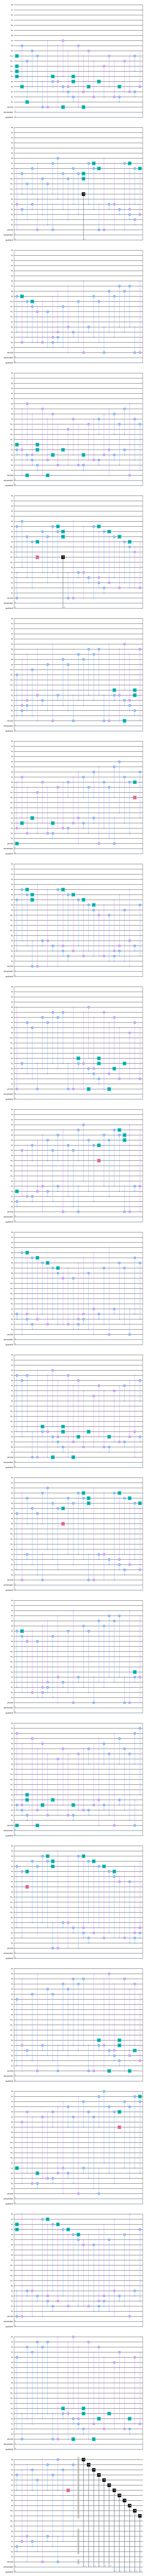

In [17]:
simulator = Aer.get_backend('qasm_simulator')
n_a=12
n_b=6
a = QuantumRegister(n_a+2, 'a')
b = QuantumRegister(n_b, 'b')
ancilla = QuantumRegister(1, 'ancilla')
remainder = ClassicalRegister(n_b, 'remainder')
quotient = ClassicalRegister((n_a+2-n_b), 'quotient')
#result = ClassicalRegister((n_a), 'result')
qc = QuantumCircuit(a, b, ancilla, remainder, quotient)
#qc = QuantumCircuit(a, b, ancilla, result)

set1 = SET_N_n(-3072,14).to_instruction()
#set1 = SET_N_n(-2050,14).to_instruction()
qc.append(set1, [a[j] for j in range(n_a+2)])

set2 = SET_N_n(37,6).to_instruction()
#set2 = SET_N_n(53,6).to_instruction()
qc.append(set2, [b[j] for j in range(n_b)])

#div = Division(n_a, n_b).decompose().to_instruction()
div = S_Division(n_a, n_b).decompose().to_instruction()
qc.append(div, [a[j] for j in range(n_a)]+[b[j] for j in range(n_b)]+[a[n_a+j] for j in range(1)]+[a[n_a+1+j] for j in range(1)]+[ancilla[j] for j in range(1)])


qc.barrier(a[0:n_a]+b[0:n_b-1]+ancilla[0:1])
#qc.barrier(b)
#qc.barrier(carry)
#qc.barrier(ancilla)
qc.measure(a[0:n_b], remainder)
qc.measure(a[n_b:n_a+2], quotient)
#qc.measure(a, result)

job = execute(qc, simulator, shots=10)
fin = job.result()
counts = fin.get_counts(qc)
print("\nTotal count for result are:",counts)
print("\nCircuit depth:",qc.decompose().depth())
print("\nCircuit ops:",qc.decompose().count_ops())
t_depth = qc.decompose().decompose().depth(lambda gate: gate[0].name in ['t', 'tdg'])
print('t depth:', t_depth)
qc.decompose().draw('mpl')

In [160]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.t([0,1])
qc.measure_all()
qc.draw()

┌───┐     ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■──┤ T ├─░─┤M├──────
        └───┘┌─┴─┐├───┤ ░ └╥┘┌─┐   
   q_1: ─────┤ X ├┤ T ├─░──╫─┤M├───
             └───┘└───┘ ░  ║ └╥┘┌─┐
   q_2: ────────────────░──╫──╫─┤M├
                        ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2


Total count for result are: {'011': 1000}

Circuit depth: 11

Circuit ops: OrderedDict([('u1', 7), ('cx', 7), ('x', 3), ('measure', 3), ('u2', 2)])
t depth: 3


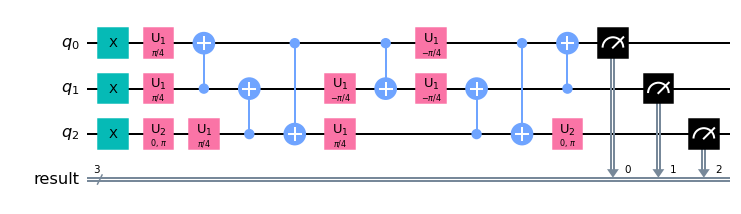

In [190]:
simulator = Aer.get_backend('qasm_simulator')
n_a=3
q = QuantumRegister(n_a, 'q')
result = ClassicalRegister(n_a, 'result')
qc = QuantumCircuit(q, result)
#qc = QuantumCircuit(3)

set1 = SET_N_n(7,3).to_instruction()
qc.append(set1, [q[j] for j in range(n_a)])

#qc.h(q[2])
#qc.barrier(q[0:3])
#qc.t(q[0])
#qc.t(q[1])
#qc.t(q[2])
#qc.barrier(q[0:3])
#qc.cx(q[1],q[0])
#qc.barrier(q[0:3])
#qc.cx(q[2],q[0])
#qc.barrier(q[0:3])
#qc.cx(q[0],q[2])
#qc.barrier(q[0:3])
#qc.tdg(q[1])
#qc.barrier(q[0:3])
#qc.cx(q[0],q[1])
#qc.barrier(q[0:3])
#qc.tdg(q[0])
#qc.tdg(q[1])
#qc.tdg(q[2])
#qc.barrier(q[0:3])
#qc.cx(q[2],q[1])
#qc.cx(q[0],q[2])
#qc.barrier(q[0:3])
#qc.h(q[0])
#qc.h(q[1])
#qc.h(q[2])


qc.h(q[2])
#qc.barrier(q[0:3])
qc.t(q[0])
qc.t(q[1])
qc.t(q[2])
#qc.barrier(q[0:3])
qc.cx(q[1],q[0])
#qc.barrier(q[0:3])
qc.cx(q[2],q[1])
#qc.barrier(q[0:3])
qc.cx(q[0],q[2])
#qc.barrier(q[0:3])
qc.tdg(q[1])
#qc.barrier(q[0:3])
qc.cx(q[0],q[1])
#qc.barrier(q[0:3])
qc.tdg(q[0])
qc.tdg(q[1])
qc.t(q[2])
#qc.barrier(q[0:3])
qc.cx(q[2],q[1])
qc.cx(q[0],q[2])
#qc.barrier(q[0:3])
qc.cx(q[1],q[0])
qc.h(q[2])
#qc.h(q[0])
#qc.h(q[1])
#qc.h(q[2])


qc.measure(q, result)

job = execute(qc, simulator, shots=1000)
fin = job.result()
counts = fin.get_counts(qc)
print("\nTotal count for result are:",counts)
print("\nCircuit depth:",qc.decompose().depth())
print("\nCircuit ops:",qc.decompose().count_ops())
t_depth = qc.depth(lambda gate: gate[0].name in ['t', 'tdg'])
print('t depth:', t_depth)
qc.decompose().draw('mpl')

In [134]:
qc.decompose().qasm(formatted=True, filename='C_CDKM_carryless.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q[18];
creg result[8];
x q[0];
x q[1];
x q[4];
x q[5];
x q[8];
cx q[9],q[1];
cx q[10],q[2];
cx q[11],q[3];
x q[12];
cx q[12],q[4];
cx q[13],q[5];
cx q[14],q[6];
cx q[9],q[16];
ccx q[0],q[8],q[16];
cx q[10],q[9];
cx q[11],q[10];
cx q[12],q[11];
cx q[13],q[12];
cx q[14],q[13];
cx q[15],q[14];
ccx q[16],q[1],q[9];
x q[16];
x q[8];
ccx q[9],q[2],q[10];
ccx q[10],q[3],q[11];
x q[10];
ccx q[11],q[4],q[12];
x q[11];
ccx q[12],q[5],q[13];
x q[12];
ccx q[13],q[6],q[14];
x q[9];
x q[17];
ccx q[17],q[8],q[0];
ccx q[17],q[16],q[1];
x q[16];
ccx q[17],q[9],q[2];
ccx q[17],q[10],q[3];
x q[10];
ccx q[17],q[11],q[4];
x q[11];
ccx q[17],q[14],q[7];
ccx q[13],q[6],q[14];
cx q[15],q[14];
ccx q[17],q[12],q[5];
x q[12];
ccx q[17],q[13],q[6];
ccx q[12],q[5],q[13];
ccx q[11],q[4],q[12];
ccx q[10],q[3],q[11];
cx q[14],q[13];
cx q[13],q[12];
cx q[12],q[11];
cx q[14],q[6];
cx q[17],q[5];
cx q[13],q[5];
cx q[17],q[4];
cx q[12],q[4];
cx q[17],q[3];
x q[8];
x q[9];
ccx q[9]

In [16]:
dir(qiskit)

['Aer',
 'AerWrapper',
 'AncillaRegister',
 'BasicAer',
 'ClassicalRegister',
 'IBMQ',
 'IBMQWrapper',
 'MissingOptionalLibraryError',
 'QiskitError',
 'QiskitVersion',
 'QuantumCircuit',
 'QuantumRegister',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__qiskit_version__',
 '__spec__',
 '__version__',
 '_accelerate',
 '_config',
 '_qasm2',
 '_user_config',
 'assemble',
 'assembler',
 'circuit',
 'compiler',
 'converters',
 'dagcircuit',
 'exceptions',
 'execute',
 'execute_function',
 'extensions',
 'namespace',
 'new_meta_path_finder',
 'pkgutil',
 'providers',
 'pulse',
 'qasm',
 'qasm2',
 'qiskit',
 'qobj',
 'quantum_info',
 'result',
 'schedule',
 'scheduler',
 'sequence',
 'synthesis',
 'sys',
 'tools',
 'transpile',
 'transpiler',
 'user_config',
 'utils',
 'version',
 'visualization',
 'warnings']

In [20]:
dir(qiskit.QuantumCircuit)

['__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_append',
 '_assign_calibration_parameters',
 '_assign_parameter',
 '_check_compatible_regs',
 '_check_dups',
 '_create_creg',
 '_create_qreg',
 '_increment_instances',
 '_name_update',
 '_peek_previous_instruction_in_scope',
 '_pop_previous_instruction_in_scope',
 '_pop_scope',
 '_push_scope',
 '_rebind_definition',
 '_resolve_classical_resource',
 '_unique_register_name',
 '_unroll_param_dict',
 '_unsorted_parameters',
 '_update_parameter_table',
 '_update_parameter_table_on_instruction_removal',
 'a